<a href="https://colab.research.google.com/github/CrisEsparza/CoderHouse/blob/main/Cristopher_Esparza_Comision61680.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Alzheimer: Un enfoque desde la Ciencia de Datos**
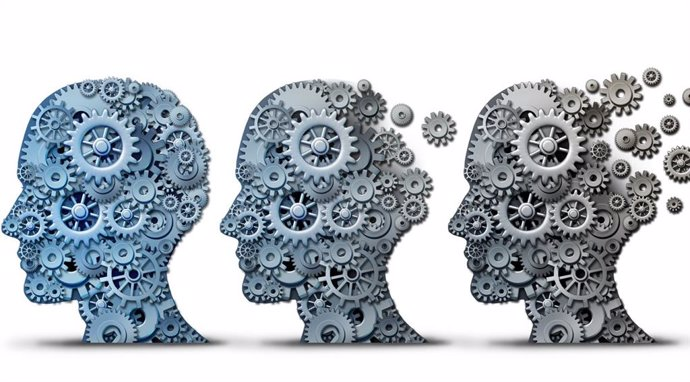

###**Abstracto con Motivación y Audiencia**
El aumento en la prevalencia del Alzheimer y el envejecimiento de la población han hecho que su detección temprana sea una prioridad en la investigación médica y social. Este proyecto tiene como objetivo desarrollar un modelo de predicción basado en Machine Learning que utilice datos demográficos, hábitos de vida, condiciones médicas y antecedentes familiares para estimar el riesgo de padecer Alzheimer. Al analizar factores como la edad, el nivel de actividad física, la calidad del sueño y el historial familiar, buscamos proporcionar información valiosa para profesionales de la salud y tomadores de decisiones que deseen implementar estrategias de prevención. Este análisis está dirigido a investigadores, médicos, neurólogos, aseguradoras de salud y responsables de políticas públicas que busquen mejorar la identificación temprana del Alzheimer para reducir su impacto social y económico.

###**Contexto Comercial y Analítico**
Desde un punto de vista comercial, la prevención y detección temprana del Alzheimer es crucial para reducir los costos médicos asociados a su tratamiento en etapas avanzadas. Las aseguradoras, hospitales y centros de cuidado especializados pueden beneficiarse de esta herramienta predictiva para ofrecer programas personalizados de prevención y mejorar la gestión del riesgo en sus clientes o pacientes.

Analíticamente, este proyecto se basa en un enfoque multifactorial de Machine Learning, explorando relaciones complejas entre diversos factores de riesgo para identificar patrones no evidentes. Al utilizar un dataset diverso que abarca desde factores biológicos hasta condiciones sociales, podemos construir un modelo robusto para la predicción del Alzheimer, mejorar la precisión de las decisiones médicas y promover la investigación basada en datos.

###**Preguntas/Hipótesis a Resolver mediante el Análisis de Datos**

¿Los factores demográficos, hábitos de vida y condiciones médicas están asociados significativamente con el diagnóstico de Alzheimer?


**Hipótesis nula (H0):**

No existe una relación significativa entre los factores demográficos, hábitos de vida y condiciones médicas con el diagnóstico de Alzheimer.


**Hipótesis alternativa (H1):**

Existe una relación significativa entre al menos uno de los factores demográficos, hábitos de vida o condiciones médicas con el diagnóstico de Alzheimer.

###**Objetivos del Trabajo**

**Objetivo General:**

Desarrollar un modelo predictivo basado en datos para identificar la probabilidad de padecer Alzheimer, analizando la influencia de factores demográficos, hábitos de vida y condiciones médicas en el diagnóstico de la enfermedad.

**Objetivos Específicos:**

1.-Identificar los factores de riesgo clave asociados al diagnóstico de Alzheimer mediante análisis estadísticos y exploratorios de las variables del dataset.

2.- Evaluar la relación entre el historial familiar de Alzheimer y el diagnóstico de la enfermedad para determinar su impacto como predictor.

3.- Determinar la influencia de los hábitos de vida, como el nivel de actividad física, calidad del sueño, consumo de alcohol y tabaco, sobre el riesgo de Alzheimer.

4.- Analizar el papel de factores médicos como diabetes, hipertensión y colesterol en el desarrollo de la enfermedad.

5.- Establecer el efecto de las condiciones sociales, como nivel educativo, empleo, estado civil y estrés, en la probabilidad de desarrollar Alzheimer.

6.- Construir y validar un modelo predictivo utilizando técnicas de Machine Learning para estimar el riesgo de Alzheimer basado en los factores analizados.

7.- Evaluar la precisión y el rendimiento del modelo para garantizar su aplicabilidad en entornos médicos y de investigación.

###**Índice de Variables**
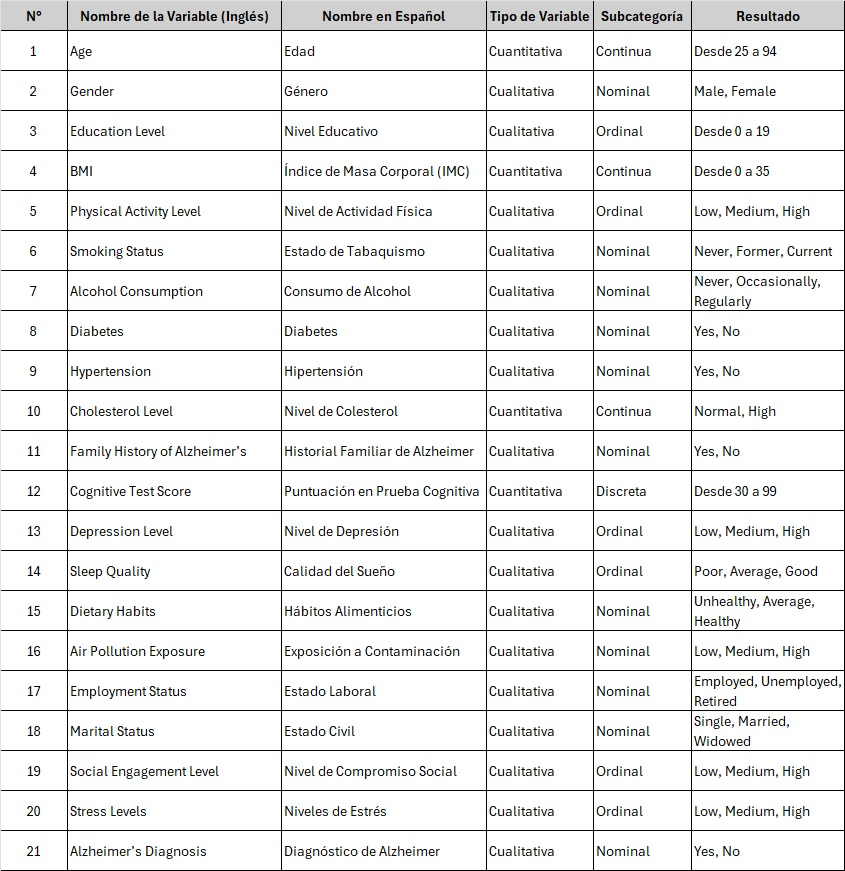

#**Lectura de Datos**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

###**Configuración del entorno de Python en Google Colab**

In [6]:
from google.colab import drive
import os
drive.mount("/content/drive")
print(os.getcwd())
os.chdir("/content/drive/My Drive/")
print(os.getcwd())

Mounted at /content/drive
/content
/content/drive/My Drive


###**Lectura del dataset**

In [7]:
df_alzheimer = pd.read_csv('/content/drive/MyDrive/alzheimer_dataset.csv', delimiter=";")

###**Análisis inicial del dataset**

In [8]:
df_alzheimer.head()

,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,...,Cognitive Test Score,Depression Level,Sleep Quality,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Social Engagement Level,Stress Levels,Alzheimer’s Diagnosis
0,90.0,Male,1.0,33.0,Medium,Never,Occasionally,No,No,Normal,...,90.0,Low,Poor,Healthy,High,Retired,Single,Low,High,No
1,72.0,Male,7.0,29.9,Medium,Former,Never,No,No,Normal,...,65.0,Low,Good,Healthy,Medium,Unemployed,Widowed,High,High,No
2,86.0,Female,19.0,22.9,High,Current,Occasionally,No,Yes,Normal,...,43.0,High,Good,Average,Medium,Employed,Single,Low,High,No
3,53.0,Male,17.0,31.2,Low,Never,Regularly,Yes,No,Normal,...,81.0,Medium,Average,Healthy,Medium,Retired,Single,High,Low,No
4,58.0,Female,3.0,30.0,High,Former,Never,Yes,No,Normal,...,49.0,High,Poor,Unhealthy,High,Employed,Married,Low,High,No


In [9]:
df_alzheimer.tail()

,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,...,Cognitive Test Score,Depression Level,Sleep Quality,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Social Engagement Level,Stress Levels,Alzheimer’s Diagnosis
76129,68.0,Male,19.0,28.4,Medium,Former,Never,Yes,No,Normal,...,88.0,Medium,Average,Healthy,High,Unemployed,Single,Medium,Low,Yes
76130,61.0,Male,2.0,12.8,Low,Current,Regularly,Yes,No,Normal,...,48.0,Medium,Poor,Average,High,Employed,Widowed,Low,Medium,No
76131,32.0,Male,10.0,8.1,Medium,Current,Never,No,Yes,Normal,...,54.0,High,Average,Healthy,Low,Employed,Married,Low,Low,No
76132,33.0,Male,10.0,33.9,Medium,Never,Occasionally,No,No,Normal,...,53.0,High,Average,Healthy,High,Employed,Widowed,Medium,High,No
76133,58.0,Male,14.0,8.7,Medium,Never,Regularly,No,No,Normal,...,42.0,Medium,Poor,Healthy,High,Unemployed,Widowed,High,Low,Yes


In [10]:
df_alzheimer.shape

(76134, 21)

In [11]:
df_alzheimer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76134 entries, 0 to 76133
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            76099 non-null  float64
 1   Gender                         76134 non-null  object 
 2   Education Level                76103 non-null  float64
 3   BMI                            76134 non-null  float64
 4   Physical Activity Level        76083 non-null  object 
 5   Smoking Status                 76099 non-null  object 
 6   Alcohol Consumption            76134 non-null  object 
 7   Diabetes                       76089 non-null  object 
 8   Hypertension                   76079 non-null  object 
 9   Cholesterol Level              76106 non-null  object 
 10  Family History of Alzheimer’s  76101 non-null  object 
 11  Cognitive Test Score           76051 non-null  float64
 12  Depression Level               76093 non-null 

In [12]:
df_alzheimer.duplicated().sum()

np.int64(0)

In [13]:
df_alzheimer.isnull().sum()

,0
Age,35
Gender,0
Education Level,31
BMI,0
Physical Activity Level,51
Smoking Status,35
Alcohol Consumption,0
Diabetes,45
Hypertension,55
Cholesterol Level,28


In [14]:
df_alzheimer.isna().sum().sum()

np.int64(687)

In [15]:
zero = df_alzheimer == 0
zero.sum()

,0
Age,0
Gender,0
Education Level,3722
BMI,38
Physical Activity Level,0
Smoking Status,0
Alcohol Consumption,0
Diabetes,0
Hypertension,0
Cholesterol Level,0


<font color='blue'>El Dataset cuenta con 76.134 filas de datos y 21 columnas, de las cuales 4 son float64 y el restante tipo object. El dataset no presenta datos duplicados que se deban eliminar, pero si presenta valores faltantes en 15 de sus columanas, llegando a un total de 687 datos faltantes. Finalmente, la base de datos presenta valores ceros, los cuales son esperables en la columna de Nivel educación, el cual se encuentra estratificado desde el 0 al 19. No así en la variable BMI, los cuales se explorará en apartados posteriores.</font>

In [16]:
df_alzheimer2 = df_alzheimer.dropna()

<font color='blue'>Se realiza la eliminación de todos los datos faltantes. Para ellos, también se crea otra variable con la finalidad de mantener una copia del dataset original.</font>

In [17]:
df_alzheimer2.isnull().sum().sum()

np.int64(0)

<font color='blue'>El nuevo dataset ya no presenta datos faltantes</font>

In [18]:
df_alzheimer2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75564 entries, 0 to 76132
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            75564 non-null  float64
 1   Gender                         75564 non-null  object 
 2   Education Level                75564 non-null  float64
 3   BMI                            75564 non-null  float64
 4   Physical Activity Level        75564 non-null  object 
 5   Smoking Status                 75564 non-null  object 
 6   Alcohol Consumption            75564 non-null  object 
 7   Diabetes                       75564 non-null  object 
 8   Hypertension                   75564 non-null  object 
 9   Cholesterol Level              75564 non-null  object 
 10  Family History of Alzheimer’s  75564 non-null  object 
 11  Cognitive Test Score           75564 non-null  float64
 12  Depression Level               75564 non-null  obje

In [19]:
df_alzheimer2.shape

(75564, 21)

<font color='blue'>Nuestra nueva base de datos presenta 75.564 filas en 21 columnas. Se realizó la eliminación de 570 instancias debido a sus datos faltantes, el cual corresponde al 0,7% de los datos de nuestro dataset original.</font>

In [20]:
df_alzheimer2.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,75564.000000,75564.000000,75564.000000,75564.000000
mean,71.676433,9.489241,26.686824,64.661585
std,13.246311,5.754597,4.906940,20.156641
min,25.000000,0.000000,0.000000,30.000000
25%,60.000000,4.000000,22.600000,47.000000
50%,72.000000,9.000000,26.700000,65.000000
75%,83.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


In [21]:
Q1_age = np.percentile(df_alzheimer2['Age'], 25)
Q3_age = np.percentile(df_alzheimer2['Age'], 75)
IQR_age = Q3_age - Q1_age

lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

outliers_age = df_alzheimer2[(df_alzheimer2['Age'] < lower_bound_age) | (df_alzheimer2['Age'] > upper_bound_age)]
print("Outliers Identificados:", outliers_age.count())

Outliers Identificados: Age                              17
Gender                           17
Education Level                  17
BMI                              17
Physical Activity Level          17
Smoking Status                   17
Alcohol Consumption              17
Diabetes                         17
Hypertension                     17
Cholesterol Level                17
Family History of Alzheimer’s    17
Cognitive Test Score             17
Depression Level                 17
Sleep Quality                    17
Dietary Habits                   17
Air Pollution Exposure           17
Employment Status                17
Marital Status                   17
Social Engagement Level          17
Stress Levels                    17
Alzheimer’s Diagnosis            17
dtype: int64


<font color='blue'>Se realiza la búsqueda de outliers por el método intercuartílico, obteniendo 17 datos de la columna "Age".</font>

In [22]:
Q1_el = np.percentile(df_alzheimer2['Education Level'], 25)
Q3_el = np.percentile(df_alzheimer2['Education Level'], 75)
IQR_el = Q3_el - Q1_el

lower_bound_el = Q1_el - 1.5 * IQR_el
upper_bound_el = Q3_el + 1.5 * IQR_el

outliers_el = df_alzheimer2[(df_alzheimer2['Education Level'] < lower_bound_el) | (df_alzheimer2['Education Level'] > upper_bound_el)]
print("Outliers Identificados:", outliers_el.count())

Outliers Identificados: Age                              0
Gender                           0
Education Level                  0
BMI                              0
Physical Activity Level          0
Smoking Status                   0
Alcohol Consumption              0
Diabetes                         0
Hypertension                     0
Cholesterol Level                0
Family History of Alzheimer’s    0
Cognitive Test Score             0
Depression Level                 0
Sleep Quality                    0
Dietary Habits                   0
Air Pollution Exposure           0
Employment Status                0
Marital Status                   0
Social Engagement Level          0
Stress Levels                    0
Alzheimer’s Diagnosis            0
dtype: int64


<font color='blue'>No se encuentran outliers por el método intercuartílico de la columna "Educatión Level"</font>

In [23]:
Q1_bmi = np.percentile(df_alzheimer2['BMI'], 25)
Q3_bmi = np.percentile(df_alzheimer2['BMI'], 75)
IQR_bmi = Q3_bmi - Q1_bmi

lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi

outliers_bmi = df_alzheimer2[(df_alzheimer2['BMI'] < lower_bound_bmi) | (df_alzheimer2['BMI'] > upper_bound_bmi)]
print("Outliers Identificados:", outliers_bmi.count())

Outliers Identificados: Age                              138
Gender                           138
Education Level                  138
BMI                              138
Physical Activity Level          138
Smoking Status                   138
Alcohol Consumption              138
Diabetes                         138
Hypertension                     138
Cholesterol Level                138
Family History of Alzheimer’s    138
Cognitive Test Score             138
Depression Level                 138
Sleep Quality                    138
Dietary Habits                   138
Air Pollution Exposure           138
Employment Status                138
Marital Status                   138
Social Engagement Level          138
Stress Levels                    138
Alzheimer’s Diagnosis            138
dtype: int64


<font color='blue'>Se encuentran 138 outliers por el método intercuartílico de la columna "BMI". Dentro de estos, podemos mencionar los valores ceros pesquisados en apartados anteriores.</font>

In [24]:
Q1_cts = np.percentile(df_alzheimer2['Cognitive Test Score'], 25)
Q3_cts = np.percentile(df_alzheimer2['Cognitive Test Score'], 75)
IQR_cts = Q3_cts - Q1_cts

lower_bound_cts = Q1_cts - 1.5 * IQR_cts
upper_bound_cts = Q3_cts + 1.5 * IQR_cts

outliers_cte = df_alzheimer2[(df_alzheimer2['Cognitive Test Score'] < lower_bound_cts) | (df_alzheimer2['Cognitive Test Score'] > upper_bound_cts)]
print("Outliers Identificados:", outliers_cte.count())

Outliers Identificados: Age                              0
Gender                           0
Education Level                  0
BMI                              0
Physical Activity Level          0
Smoking Status                   0
Alcohol Consumption              0
Diabetes                         0
Hypertension                     0
Cholesterol Level                0
Family History of Alzheimer’s    0
Cognitive Test Score             0
Depression Level                 0
Sleep Quality                    0
Dietary Habits                   0
Air Pollution Exposure           0
Employment Status                0
Marital Status                   0
Social Engagement Level          0
Stress Levels                    0
Alzheimer’s Diagnosis            0
dtype: int64


<font color='blue'>No se encuentran outliers por el método intercuartílico de la columna "Cognitive Test Score"</font>

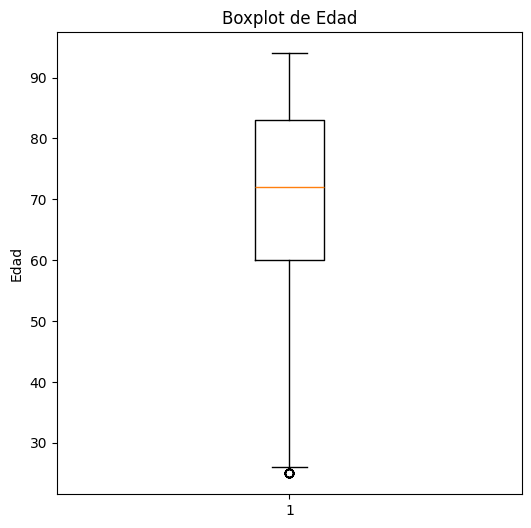

In [25]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.boxplot(df_alzheimer2['Age'])
ax.set_title('Boxplot de Edad')
ax.set_ylabel('Edad')
plt.show()

<font color='blue'>Al realizar un boxplot de la columna Age, podemos visualizar la presencia de outliers, lo cual reafirma lo obtenido con el método intercuartílico.</font>

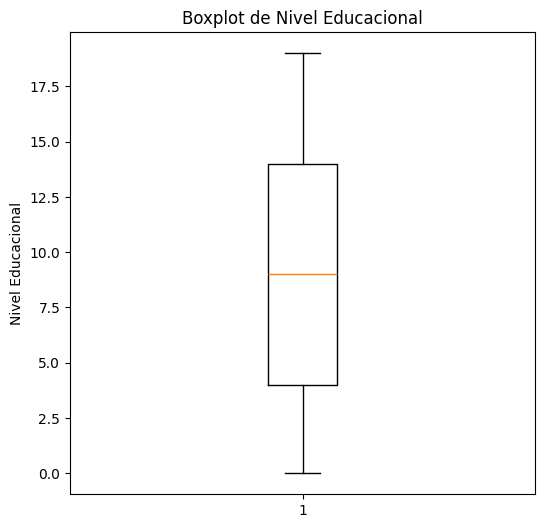

In [26]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.boxplot(df_alzheimer2['Education Level'])
ax.set_title('Boxplot de Nivel Educacional')
ax.set_ylabel('Nivel Educacional')
plt.show()

<font color='blue'>Al realizar un boxplot de la columna Education Level, no se visualizan la presencia de outliers, lo cual reafirma lo obtenido con el método intercuartílico.</font>

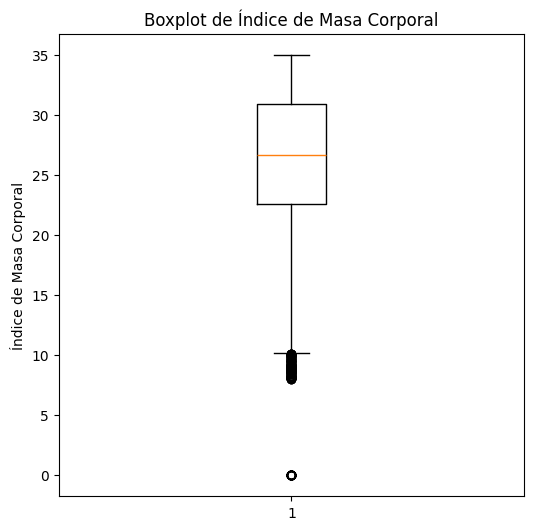

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.boxplot(df_alzheimer2['BMI'])
ax.set_title('Boxplot de Índice de Masa Corporal')
ax.set_ylabel('Índice de Masa Corporal')
plt.show()

<font color='blue'>Al realizar un boxplot de la columna BMI, podemos visualizar la presencia de outliers, lo cual reafirma lo obtenido con el método intercuartílico.</font>

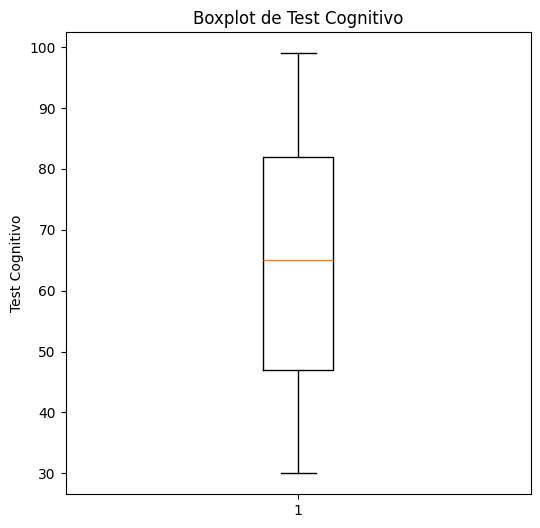

In [28]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.boxplot(df_alzheimer2['Cognitive Test Score'])
ax.set_title('Boxplot de Test Cognitivo')
ax.set_ylabel('Test Cognitivo')
plt.show()

<font color='blue'>Al realizar un boxplot de la columna Cognitive Test Score, no se visualizan la presencia de outliers, lo cual reafirma lo obtenido con el método intercuartílico.</font>

<Axes: >

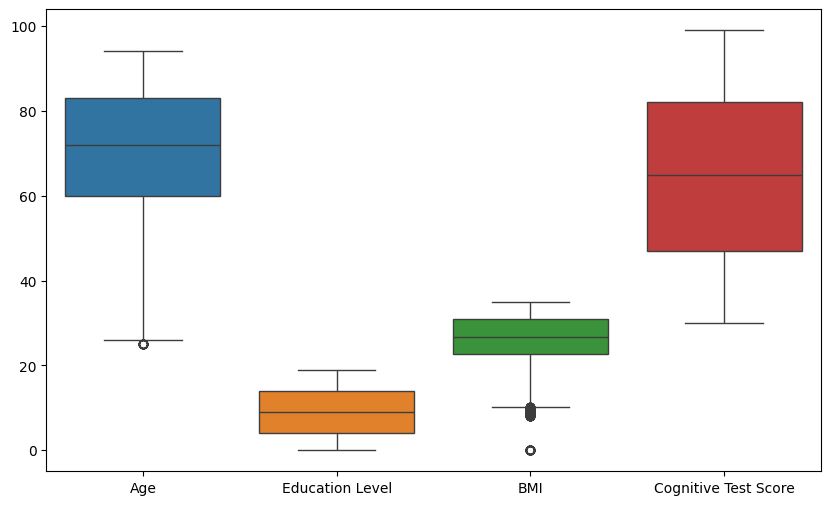

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_alzheimer2[['Age', 'Education Level', 'BMI', 'Cognitive Test Score']], ax=ax)

<font color='blue'>En una vista general de boxplot de las variables cuantitativas evaluadas, podemos ver que en las varibles Age y BMI, se encuentran la presencia de Outliers. </font>

In [30]:
z_scores_age = np.abs(stats.zscore(df_alzheimer2['Age']))
z_scores_bmi = np.abs(stats.zscore(df_alzheimer2['BMI']))
z_scores_cts = np.abs(stats.zscore(df_alzheimer2['Cognitive Test Score']))
z_score_el = np.abs(stats.zscore(df_alzheimer2['Education Level']))

sin_outliers_age = df_alzheimer2[(z_scores_age < 3)]
sin_outliers_bmi = df_alzheimer2[(z_scores_bmi < 3)]
sin_outliers_cts = df_alzheimer2[(z_scores_cts < 3)]
sin_outliers_el = df_alzheimer2[(z_score_el < 3)]

print("Número de Outliers en Age:", len(df_alzheimer2) - len(sin_outliers_age))
print("Número de Outliers en BMI:", len(df_alzheimer2) - len(sin_outliers_bmi))
print("Número de Outliers en Cognitive Test Score:", len(df_alzheimer2) - len(sin_outliers_cts))
print("Número de Outliers en Education Level:", len(df_alzheimer2) - len(sin_outliers_el))

Número de Outliers en Age: 131
Número de Outliers en BMI: 207
Número de Outliers en Cognitive Test Score: 0
Número de Outliers en Education Level: 0


<font color='blue'>Haciendo una evaluación con el método de Z Score, obtenemos la presencia de Outlier en las mismas variable, pero la diferencia radica en que con este método hay una mayor cuantificación en el total.</font>

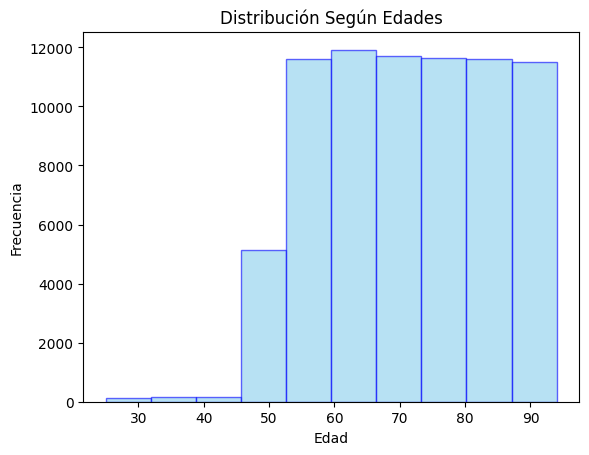

In [31]:
plt.hist(df_alzheimer2['Age'], bins=10, color='skyblue', edgecolor='blue', alpha=0.6)
plt.title('Distribución Según Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

<font color='blue'>Haciendo una evaluación de Outliers con histogramas, reafirmamos la presencia, debido a la diferencia de frecuencias en las edades, las cuales hay una frecuencia significativamente menos en personas alrededor de los 45 años. </font>

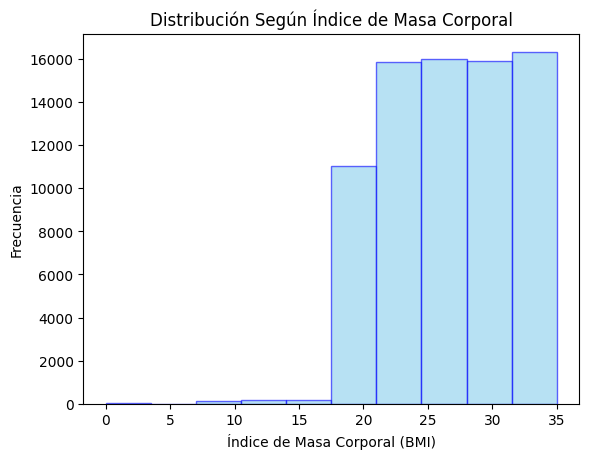

In [32]:
plt.hist(df_alzheimer2['BMI'], bins=10, color='skyblue', edgecolor='blue', alpha=0.6)
plt.title('Distribución Según Índice de Masa Corporal')
plt.xlabel('Índice de Masa Corporal (BMI)')
plt.ylabel('Frecuencia')
plt.show()

<font color='blue'>Con el índice de masa corporal también podemos observar la presencia de outliers, debido a que la frecuencia decae significativamente para los valores bajo el 18.</font>

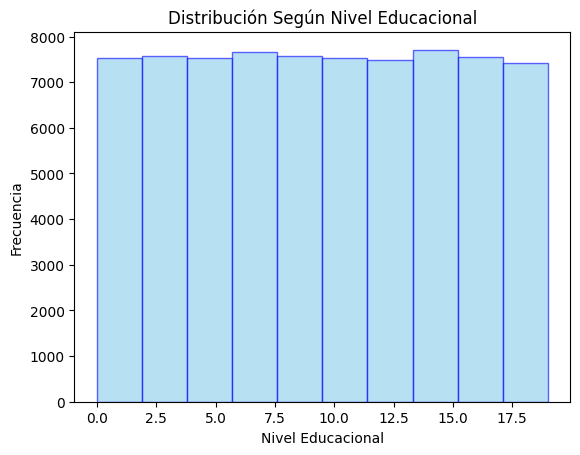

In [33]:
plt.hist(df_alzheimer2['Education Level'], bins=10, color='skyblue', edgecolor='blue', alpha=0.6)
plt.title('Distribución Según Nivel Educacional')
plt.xlabel('Nivel Educacional')
plt.ylabel('Frecuencia')
plt.show()

<font color='blue'>Se visualiza una frecuencia pareja entre todos los valores de la variable. </font>

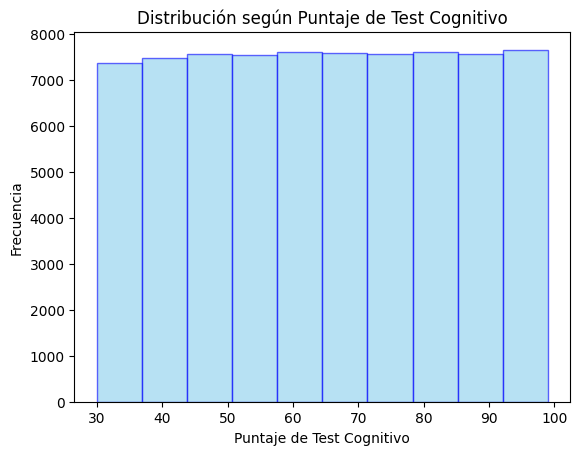

In [34]:
plt.hist(df_alzheimer2['Cognitive Test Score'], bins=10, color='skyblue', edgecolor='blue', alpha=0.6)
plt.title('Distribución según Puntaje de Test Cognitivo')
plt.xlabel('Puntaje de Test Cognitivo')
plt.ylabel('Frecuencia')
plt.show()

<font color='blue'>Se visualiza una frecuencia pareja entre todos los valores de la variable. </font>

In [35]:
df_alzheimer_filtered_age = df_alzheimer2[(df_alzheimer2['Age'] >= lower_bound_age) & (df_alzheimer2['Age'] <= upper_bound_age)]

<font color='blue'>Se crea una nueva variable, la cual no contiene los datos pesquisados como outliers de la variable "Age" bajo el método intercuartílico. </font>

In [36]:
Q1_age2 = np.percentile(df_alzheimer_filtered_age['Age'], 25)
Q3_age2 = np.percentile(df_alzheimer_filtered_age['Age'], 75)
IQR_age2 = Q3_age2 - Q1_age2

lower_bound_age2 = Q1_age2 - 1.5 * IQR_age2
upper_bound_age2 = Q3_age2 + 1.5 * IQR_age2

outliers_age2 = df_alzheimer_filtered_age[(df_alzheimer_filtered_age['Age'] < lower_bound_age2) | (df_alzheimer_filtered_age['Age'] > upper_bound_age2)]
print("Outliers Identificados:", outliers_age2.count())

Outliers Identificados: Age                              41
Gender                           41
Education Level                  41
BMI                              41
Physical Activity Level          41
Smoking Status                   41
Alcohol Consumption              41
Diabetes                         41
Hypertension                     41
Cholesterol Level                41
Family History of Alzheimer’s    41
Cognitive Test Score             41
Depression Level                 41
Sleep Quality                    41
Dietary Habits                   41
Air Pollution Exposure           41
Employment Status                41
Marital Status                   41
Social Engagement Level          41
Stress Levels                    41
Alzheimer’s Diagnosis            41
dtype: int64


<font color='blue'>Se evalua nuevamente la presencia de outliers bajo el método intercuartílico, de la variable "Age". Presentando nuevamente la presencia de 41 outliers. </font>

In [37]:
df_alzheimer_filtered_age2 = df_alzheimer_filtered_age[(df_alzheimer_filtered_age['Age'] >= lower_bound_age2) & (df_alzheimer_filtered_age['Age'] <= upper_bound_age2)]


<font color='blue'>Se crea otra variable la cual no contenga los outliers pesquisados en le punto anterior. </font>

In [38]:
Q1_age3 = np.percentile(df_alzheimer_filtered_age2['Age'], 25)
Q3_age3 = np.percentile(df_alzheimer_filtered_age2['Age'], 75)
IQR_age3 = Q3_age3 - Q1_age3

lower_bound_age3 = Q1_age3 - 1.5 * IQR_age3
upper_bound_age3 = Q3_age3 + 1.5 * IQR_age3

outliers_age3 = df_alzheimer_filtered_age2[(df_alzheimer_filtered_age2['Age'] < lower_bound_age3) | (df_alzheimer_filtered_age2['Age'] > upper_bound_age3)]
print("Outliers Identificados:", outliers_age3.count())

Outliers Identificados: Age                              0
Gender                           0
Education Level                  0
BMI                              0
Physical Activity Level          0
Smoking Status                   0
Alcohol Consumption              0
Diabetes                         0
Hypertension                     0
Cholesterol Level                0
Family History of Alzheimer’s    0
Cognitive Test Score             0
Depression Level                 0
Sleep Quality                    0
Dietary Habits                   0
Air Pollution Exposure           0
Employment Status                0
Marital Status                   0
Social Engagement Level          0
Stress Levels                    0
Alzheimer’s Diagnosis            0
dtype: int64


<font color='blue'>Finalmente, no se pesquisan outliers en la varible Age.</font>

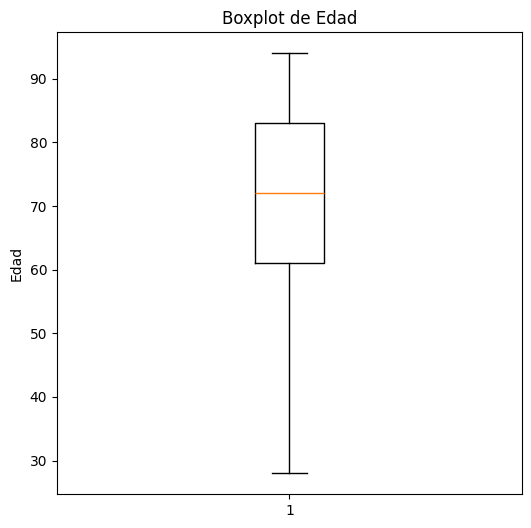

In [39]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.boxplot(df_alzheimer_filtered_age2['Age'])
ax.set_title('Boxplot de Edad')
ax.set_ylabel('Edad')
plt.show()

<font color='blue'>No se visualizan la presencia de outliers en el boxplot </font>

In [40]:
df_alzheimer_filtered_bmi = df_alzheimer_filtered_age2[(df_alzheimer_filtered_age2['BMI'] >= lower_bound_bmi) & (df_alzheimer_filtered_age2['BMI'] <= upper_bound_bmi)]

In [41]:
Q1_bmi2 = np.percentile(df_alzheimer_filtered_bmi['BMI'], 25)
Q3_bmi2 = np.percentile(df_alzheimer_filtered_bmi['BMI'], 75)
IQR_bmi2 = Q3_bmi2 - Q1_bmi2

lower_bound_bmi2 = Q1_bmi2 - 1.5 * IQR_bmi2
upper_bound_bmi2 = Q3_bmi2 + 1.5 * IQR_bmi2

outliers_bmi2 = df_alzheimer_filtered_bmi[(df_alzheimer_filtered_bmi['BMI'] < lower_bound_bmi2) | (df_alzheimer_filtered_bmi['BMI'] > upper_bound_bmi2)]
print("Outliers Identificados:", outliers_bmi2.count())

Outliers Identificados: Age                              0
Gender                           0
Education Level                  0
BMI                              0
Physical Activity Level          0
Smoking Status                   0
Alcohol Consumption              0
Diabetes                         0
Hypertension                     0
Cholesterol Level                0
Family History of Alzheimer’s    0
Cognitive Test Score             0
Depression Level                 0
Sleep Quality                    0
Dietary Habits                   0
Air Pollution Exposure           0
Employment Status                0
Marital Status                   0
Social Engagement Level          0
Stress Levels                    0
Alzheimer’s Diagnosis            0
dtype: int64


<font color='blue'>No se visualizan la presencia de outliers en la variable BMI </font>

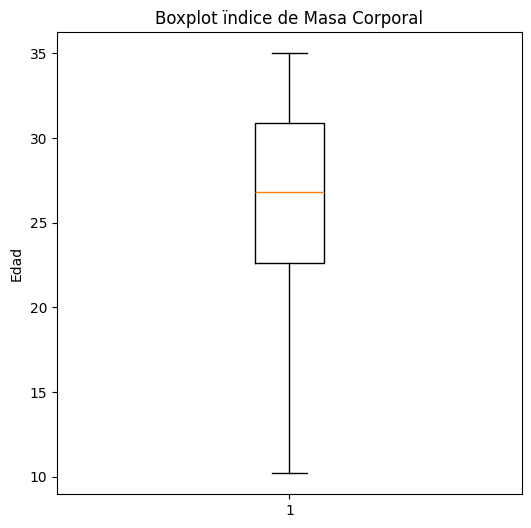

In [42]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.boxplot(df_alzheimer_filtered_bmi['BMI'])
ax.set_title('Boxplot ïndice de Masa Corporal')
ax.set_ylabel('Edad')
plt.show()

<font color='blue'>No se visualizan la presencia de outliers en el boxplot </font>

In [43]:
df_alzheimer_final = df_alzheimer_filtered_bmi

<font color='blue'>Se crea otra variable, la cual no contenga los outliers pesquisados anteriormente. </font>

<Axes: >

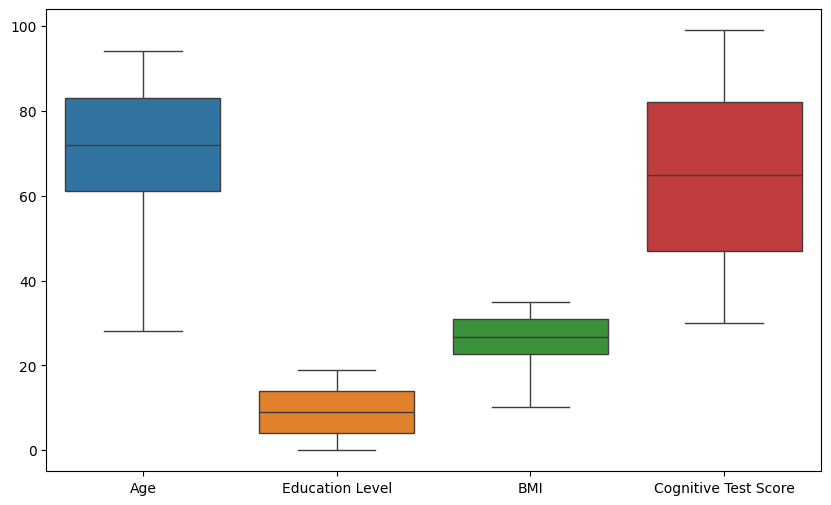

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_alzheimer_final[['Age', 'Education Level', 'BMI', 'Cognitive Test Score']], ax=ax)

<font color='blue'>En una vista general del nuevo dataset, no se observan outliers en los boxplot de las variables analizadas. </font>

In [45]:
df_alzheimer_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75373 entries, 0 to 76132
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            75373 non-null  float64
 1   Gender                         75373 non-null  object 
 2   Education Level                75373 non-null  float64
 3   BMI                            75373 non-null  float64
 4   Physical Activity Level        75373 non-null  object 
 5   Smoking Status                 75373 non-null  object 
 6   Alcohol Consumption            75373 non-null  object 
 7   Diabetes                       75373 non-null  object 
 8   Hypertension                   75373 non-null  object 
 9   Cholesterol Level              75373 non-null  object 
 10  Family History of Alzheimer’s  75373 non-null  object 
 11  Cognitive Test Score           75373 non-null  float64
 12  Depression Level               75373 non-null  obje

In [46]:
df_alzheimer_final.shape

(75373, 21)

In [47]:
df_alzheimer_final.isnull().sum().sum()

np.int64(0)

<font color='blue'>Finalmente, el dataset final a utilizar para la segunda parte del proyecto presenta 75.373 y 21 columnas. Durante los pasos anteriores se eliminaron un total de 761 filas, de las cuales presentaban datos nulos y outliers, representando un 1% del total inicial de filas.  </font>

In [48]:
df_alzheimer_final.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,75373.000000,75373.000000,75373.000000,75373.000000
mean,71.737890,9.488225,26.726758,64.663872
std,13.168766,5.754938,4.830789,20.158012
min,28.000000,0.000000,10.200000,30.000000
25%,61.000000,4.000000,22.600000,47.000000
50%,72.000000,9.000000,26.800000,65.000000
75%,83.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


<font color='blue'>De las variables numericas, podemos mencionar lo siguiente: La variable "Age" va desde los 28 hasta los 94 años, con un promedio y una mediana de 72 años. La variable "Education Level" va desde el 0 a los 19, teniendo un promedio y mediana de educación de nivel 9. El índice de masa corporal va desde los 10 puntos hasta los 35, con un promedio de 26,7 puntos. FInalmente, la variable "Cognitive Test Score" va desde los 30 puntos hasta los 99 puntos, con un promedio y mediana de 65 puntos.</font>

#**EDA: Análisis Exploratorio de datos**

###**Análisis Univariado**

En este apartado, se realizará una revisión individual de cada una de las variables de nuestro dataset tanto de sus valores absolutos como sus valores porcentuales.

In [49]:
df_alzheimer_final['Gender'].value_counts()

,count
Gender,
Female,37774
Male,37599


In [50]:
porcentaje_gender = df_alzheimer_final['Gender'].value_counts(normalize=True).round(4) * 100
print(porcentaje_gender)

Gender
Female    50.12
Male      49.88
Name: proportion, dtype: float64


In [51]:
df_alzheimer_final['Physical Activity Level'].value_counts ()

,count
Physical Activity Level,
High,25203
Low,25127
Medium,25043


In [52]:
porcentaje_physical = df_alzheimer_final['Physical Activity Level'].value_counts(normalize=True).round(4) * 100
print(porcentaje_physical)

Physical Activity Level
High      33.44
Low       33.34
Medium    33.23
Name: proportion, dtype: float64


In [53]:
df_alzheimer_final['Smoking Status'].value_counts()

,count
Smoking Status,
Current,25285
Never,25105
Former,24983


In [54]:
porcentaje_smoking = df_alzheimer_final['Smoking Status'].value_counts(normalize=True).round(4) * 100
print(porcentaje_smoking)

Smoking Status
Current    33.55
Never      33.31
Former     33.15
Name: proportion, dtype: float64


In [55]:
df_alzheimer_final['Alcohol Consumption'].value_counts()

,count
Alcohol Consumption,
Never,25203
Regularly,25107
Occasionally,25063


In [56]:
porcentaje_alcohol = df_alzheimer_final['Alcohol Consumption'].value_counts(normalize=True).round(4) * 100
print(porcentaje_alcohol)

Alcohol Consumption
Never           33.44
Regularly       33.31
Occasionally    33.25
Name: proportion, dtype: float64


In [57]:
df_alzheimer_final['Diabetes'].value_counts()

,count
Diabetes,
No,60063
Yes,15310


In [58]:
porcentaje_diabetes = df_alzheimer_final['Diabetes'].value_counts(normalize=True).round(4) * 100
print(porcentaje_diabetes)

Diabetes
No     79.69
Yes    20.31
Name: proportion, dtype: float64


In [59]:
df_alzheimer_final['Hypertension'].value_counts()

,count
Hypertension,
No,52670
Yes,22703


In [60]:
porcentaje_hipertension = df_alzheimer_final['Hypertension'].value_counts(normalize=True).round(4) * 100
print(porcentaje_hipertension)

Hypertension
No     69.88
Yes    30.12
Name: proportion, dtype: float64


In [61]:
df_alzheimer_final['Cholesterol Level'].value_counts()

,count
Cholesterol Level,
Normal,52516
High,22857


In [62]:
porcentaje_cholesterol = df_alzheimer_final['Cholesterol Level'].value_counts(normalize=True).round(4) * 100
print(porcentaje_cholesterol)

Cholesterol Level
Normal    69.67
High      30.33
Name: proportion, dtype: float64


In [63]:
df_alzheimer_final['Family History of Alzheimer’s'].value_counts()

,count
Family History of Alzheimer’s,
No,52544
Yes,22829


In [64]:
porcentaje_history = df_alzheimer_final['Family History of Alzheimer’s'].value_counts(normalize=True).round(4) * 100
print(porcentaje_history)

Family History of Alzheimer’s
No     69.71
Yes    30.29
Name: proportion, dtype: float64


In [65]:
df_alzheimer_final['Depression Level'].value_counts()

,count
Depression Level,
Medium,25207
Low,25123
High,25043


In [66]:
porcentaje_depression = df_alzheimer_final['Depression Level'].value_counts(normalize=True).round(4) * 100
print(porcentaje_depression)

Depression Level
Medium    33.44
Low       33.33
High      33.23
Name: proportion, dtype: float64


In [67]:
df_alzheimer_final['Sleep Quality'].value_counts()

,count
Sleep Quality,
Good,25507
Average,25074
Poor,24792


In [68]:
porcentaje_sleep = df_alzheimer_final['Sleep Quality'].value_counts(normalize=True).round(4) * 100
print(porcentaje_sleep)

Sleep Quality
Good       33.84
Average    33.27
Poor       32.89
Name: proportion, dtype: float64


In [69]:
df_alzheimer_final['Air Pollution Exposure'].value_counts()

,count
Air Pollution Exposure,
High,25273
Medium,25098
Low,25002


In [70]:
porcentaje_pollution = df_alzheimer_final['Air Pollution Exposure'].value_counts(normalize=True).round(4) * 100
print(porcentaje_pollution)

Air Pollution Exposure
High      33.53
Medium    33.30
Low       33.17
Name: proportion, dtype: float64


In [71]:
df_alzheimer_final['Dietary Habits'].value_counts()

,count
Dietary Habits,
Average,25284
Healthy,25060
Unhealthy,25029


In [72]:
porcentaje_dietary = df_alzheimer_final['Dietary Habits'].value_counts(normalize=True).round(4) * 100
print(porcentaje_dietary)

Dietary Habits
Average      33.55
Healthy      33.25
Unhealthy    33.21
Name: proportion, dtype: float64


In [73]:
df_alzheimer_final['Employment Status'].value_counts()

,count
Employment Status,
Unemployed,25324
Employed,25322
Retired,24727


In [74]:
porcentaje_employment = df_alzheimer_final['Employment Status'].value_counts(normalize=True).round(4) * 100
print(porcentaje_employment)

Employment Status
Unemployed    33.60
Employed      33.60
Retired       32.81
Name: proportion, dtype: float64


In [75]:
df_alzheimer_final['Marital Status'].value_counts()

,count
Marital Status,
Single,25536
Married,24929
Widowed,24908


In [76]:
porcentaje_marital = df_alzheimer_final['Marital Status'].value_counts(normalize=True).round(4) * 100
print(porcentaje_marital)

Marital Status
Single     33.88
Married    33.07
Widowed    33.05
Name: proportion, dtype: float64


In [77]:
df_alzheimer_final['Social Engagement Level'].value_counts()

,count
Social Engagement Level,
Medium,25204
Low,25117
High,25052


In [78]:
porcentaje_social = df_alzheimer_final['Social Engagement Level'].value_counts(normalize=True).round(4) * 100
print(porcentaje_social)

Social Engagement Level
Medium    33.44
Low       33.32
High      33.24
Name: proportion, dtype: float64


In [79]:
df_alzheimer_final['Stress Levels'].value_counts()

,count
Stress Levels,
Medium,25249
Low,25115
High,25009


In [80]:
porcentaje_stress = df_alzheimer_final['Stress Levels'].value_counts(normalize=True).round(4) * 100
print(porcentaje_stress)

Stress Levels
Medium    33.50
Low       33.32
High      33.18
Name: proportion, dtype: float64


In [81]:
df_alzheimer_final['Alzheimer’s Diagnosis'].value_counts()

,count
Alzheimer’s Diagnosis,
No,44107
Yes,31266


In [82]:
porcentaje_alzheimer = df_alzheimer_final['Alzheimer’s Diagnosis'].value_counts(normalize=True).round(4) * 100
print(porcentaje_alzheimer)

Alzheimer’s Diagnosis
No     58.52
Yes    41.48
Name: proportion, dtype: float64


<font color='blue'>Del análisis univariado de todas las variables, podemos decir que la mayoría de ellas se encontraba equilibrada. Esto quiere decir, que si una variable contaba con dos categorías, los resultados de esta se encontraban alrededor del 50% de los datos en cada una. Si una variable contaba con tres categorías, esta se distribuia equilibradamente en un 33# cada una. Podemos ver que existen algunas excepciones, de las cuales podemos nombrar el diagnóstico de diabetes, el cual el 80% de los encuentados no contaba con la enfermedad y el 20% si la presntaba. Similar el caso para el diagnótico de la hipertensión, colesterol y antecedentes familiares de alzheimer, en los cuales su distribución fue de 70% los que no presentaban esas patologías y 20% los que si la presnetaban. Finalmente, en relación al diagnóstico de alzheimer, el 58% de las personas no contaban con la enfermedad, versus el 42 que si la presentaba.</font>

###**Análisis Bivariado**

En este apartado, se realizará una agrupación entre la variable Alzheimer con cada una de las variables de nuestro dataset. Esta agrupación se realizará con sus valores absolutos y luego con sus valores porcentuales.

In [83]:
df_alzheimer_final.groupby(['Gender'])["Alzheimer’s Diagnosis"].value_counts()

Gender  Alzheimer’s Diagnosis
Female  No                       22133
        Yes                      15641
Male    No                       21974
        Yes                      15625
Name: count, dtype: int64

In [84]:
porcentaje_alzheimer_gender = df_alzheimer_final.groupby(['Gender'])["Alzheimer’s Diagnosis"].value_counts(normalize=True).round(4) * 100
print(porcentaje_alzheimer_gender)

Gender  Alzheimer’s Diagnosis
Female  No                       58.59
        Yes                      41.41
Male    No                       58.44
        Yes                      41.56
Name: proportion, dtype: float64


In [85]:
df_alzheimer_final.groupby(['Physical Activity Level'])["Alzheimer’s Diagnosis"].value_counts()

Physical Activity Level  Alzheimer’s Diagnosis
High                     No                       14672
                         Yes                      10531
Low                      No                       14724
                         Yes                      10403
Medium                   No                       14711
                         Yes                      10332
Name: count, dtype: int64

In [86]:
porcentaje_alzheimer_physical = df_alzheimer_final.groupby(['Physical Activity Level'])["Alzheimer’s Diagnosis"].value_counts(normalize=True).round(4) * 100
print(porcentaje_alzheimer_physical)

Physical Activity Level  Alzheimer’s Diagnosis
High                     No                       58.22
                         Yes                      41.78
Low                      No                       58.60
                         Yes                      41.40
Medium                   No                       58.74
                         Yes                      41.26
Name: proportion, dtype: float64


In [87]:
df_alzheimer_final.groupby(['Smoking Status'])["Alzheimer’s Diagnosis"].value_counts()

Smoking Status  Alzheimer’s Diagnosis
Current         No                       14830
                Yes                      10455
Former          No                       14639
                Yes                      10344
Never           No                       14638
                Yes                      10467
Name: count, dtype: int64

In [88]:
porcentaje_alzheimer_smoking = df_alzheimer_final.groupby(['Smoking Status'])["Alzheimer’s Diagnosis"].value_counts(normalize=True).round(4) * 100
print(porcentaje_alzheimer_smoking)

Smoking Status  Alzheimer’s Diagnosis
Current         No                       58.65
                Yes                      41.35
Former          No                       58.60
                Yes                      41.40
Never           No                       58.31
                Yes                      41.69
Name: proportion, dtype: float64


In [89]:
df_alzheimer_final.groupby(['Alcohol Consumption'])["Alzheimer’s Diagnosis"].value_counts()

Alcohol Consumption  Alzheimer’s Diagnosis
Never                No                       14825
                     Yes                      10378
Occasionally         No                       14580
                     Yes                      10483
Regularly            No                       14702
                     Yes                      10405
Name: count, dtype: int64

In [90]:
porcentaje_alzheimer_alcohol = df_alzheimer_final.groupby(['Alcohol Consumption'])["Alzheimer’s Diagnosis"].value_counts(normalize=True).round(4) * 100
print(porcentaje_alzheimer_alcohol)

Alcohol Consumption  Alzheimer’s Diagnosis
Never                No                       58.82
                     Yes                      41.18
Occasionally         No                       58.17
                     Yes                      41.83
Regularly            No                       58.56
                     Yes                      41.44
Name: proportion, dtype: float64


In [91]:
df_alzheimer_final.groupby(['Diabetes'])["Alzheimer’s Diagnosis"].value_counts()

Diabetes  Alzheimer’s Diagnosis
No        No                       35124
          Yes                      24939
Yes       No                        8983
          Yes                       6327
Name: count, dtype: int64

In [92]:
porcentaje_alzheimer_diabetes = df_alzheimer_final.groupby(['Diabetes'])["Alzheimer’s Diagnosis"].value_counts(normalize=True).round(4) * 100
print(porcentaje_alzheimer_diabetes)

Diabetes  Alzheimer’s Diagnosis
No        No                       58.48
          Yes                      41.52
Yes       No                       58.67
          Yes                      41.33
Name: proportion, dtype: float64


In [93]:
df_alzheimer_final.groupby(['Hypertension'])["Alzheimer’s Diagnosis"].value_counts()

Hypertension  Alzheimer’s Diagnosis
No            No                       30813
              Yes                      21857
Yes           No                       13294
              Yes                       9409
Name: count, dtype: int64

In [94]:
porcentaje_alzheimer_hipertension = df_alzheimer_final.groupby(['Hypertension'])["Alzheimer’s Diagnosis"].value_counts(normalize=True).round(4) * 100
print(porcentaje_alzheimer_hipertension)

Hypertension  Alzheimer’s Diagnosis
No            No                       58.50
              Yes                      41.50
Yes           No                       58.56
              Yes                      41.44
Name: proportion, dtype: float64


In [95]:
df_alzheimer_final.groupby(['Cholesterol Level'])["Alzheimer’s Diagnosis"].value_counts()

Cholesterol Level  Alzheimer’s Diagnosis
High               No                       13392
                   Yes                       9465
Normal             No                       30715
                   Yes                      21801
Name: count, dtype: int64

In [96]:
porcentaje_alzheimer_cholesterol = df_alzheimer_final.groupby(['Cholesterol Level'])["Alzheimer’s Diagnosis"].value_counts(normalize=True).round(4) * 100
print(porcentaje_alzheimer_cholesterol)

Cholesterol Level  Alzheimer’s Diagnosis
High               No                       58.59
                   Yes                      41.41
Normal             No                       58.49
                   Yes                      41.51
Name: proportion, dtype: float64


In [97]:
df_alzheimer_final.groupby(['Family History of Alzheimer’s'])["Alzheimer’s Diagnosis"].value_counts()

Family History of Alzheimer’s  Alzheimer’s Diagnosis
No                             No                       33119
                               Yes                      19425
Yes                            Yes                      11841
                               No                       10988
Name: count, dtype: int64

In [98]:
porcentaje_alzheimer_history = df_alzheimer_final.groupby(['Family History of Alzheimer’s'])["Alzheimer’s Diagnosis"].value_counts(normalize=True).round(4) * 100
print(porcentaje_alzheimer_history)

Family History of Alzheimer’s  Alzheimer’s Diagnosis
No                             No                       63.03
                               Yes                      36.97
Yes                            Yes                      51.87
                               No                       48.13
Name: proportion, dtype: float64


In [99]:
df_alzheimer_final.groupby(['Depression Level'])["Alzheimer’s Diagnosis"].value_counts()

Depression Level  Alzheimer’s Diagnosis
High              No                       14624
                  Yes                      10419
Low               No                       14683
                  Yes                      10440
Medium            No                       14800
                  Yes                      10407
Name: count, dtype: int64

In [100]:
porcentaje_alzheimer_depression = df_alzheimer_final.groupby(['Depression Level'])["Alzheimer’s Diagnosis"].value_counts(normalize=True).round(4) * 100
print(porcentaje_alzheimer_depression)

Depression Level  Alzheimer’s Diagnosis
High              No                       58.40
                  Yes                      41.60
Low               No                       58.44
                  Yes                      41.56
Medium            No                       58.71
                  Yes                      41.29
Name: proportion, dtype: float64


In [101]:
df_alzheimer_final.groupby(['Sleep Quality'])["Alzheimer’s Diagnosis"].value_counts()

Sleep Quality  Alzheimer’s Diagnosis
Average        No                       14670
               Yes                      10404
Good           No                       14944
               Yes                      10563
Poor           No                       14493
               Yes                      10299
Name: count, dtype: int64

In [102]:
porcentaje_alzheimer_sleep = df_alzheimer_final.groupby(['Sleep Quality'])["Alzheimer’s Diagnosis"].value_counts(normalize=True).round(4) * 100
print(porcentaje_alzheimer_sleep)

Sleep Quality  Alzheimer’s Diagnosis
Average        No                       58.51
               Yes                      41.49
Good           No                       58.59
               Yes                      41.41
Poor           No                       58.46
               Yes                      41.54
Name: proportion, dtype: float64


In [103]:
df_alzheimer_final.groupby(['Air Pollution Exposure'])["Alzheimer’s Diagnosis"].value_counts()

Air Pollution Exposure  Alzheimer’s Diagnosis
High                    No                       14831
                        Yes                      10442
Low                     No                       14545
                        Yes                      10457
Medium                  No                       14731
                        Yes                      10367
Name: count, dtype: int64

In [104]:
porcentaje_alzheimer_pollution = df_alzheimer_final.groupby(['Air Pollution Exposure'])["Alzheimer’s Diagnosis"].value_counts(normalize=True).round(4) * 100
print(porcentaje_alzheimer_pollution)

Air Pollution Exposure  Alzheimer’s Diagnosis
High                    No                       58.68
                        Yes                      41.32
Low                     No                       58.18
                        Yes                      41.82
Medium                  No                       58.69
                        Yes                      41.31
Name: proportion, dtype: float64


In [105]:
df_alzheimer_final.groupby(['Dietary Habits'])["Alzheimer’s Diagnosis"].value_counts()

Dietary Habits  Alzheimer’s Diagnosis
Average         No                       14822
                Yes                      10462
Healthy         No                       14709
                Yes                      10351
Unhealthy       No                       14576
                Yes                      10453
Name: count, dtype: int64

In [106]:
porcentaje_alzheimer_dietary = df_alzheimer_final.groupby(['Dietary Habits'])["Alzheimer’s Diagnosis"].value_counts(normalize=True).round(4) * 100
print(porcentaje_alzheimer_dietary)

Dietary Habits  Alzheimer’s Diagnosis
Average         No                       58.62
                Yes                      41.38
Healthy         No                       58.70
                Yes                      41.30
Unhealthy       No                       58.24
                Yes                      41.76
Name: proportion, dtype: float64


In [107]:
df_alzheimer_final.groupby(['Employment Status'])["Alzheimer’s Diagnosis"].value_counts()

Employment Status  Alzheimer’s Diagnosis
Employed           No                       14906
                   Yes                      10416
Retired            No                       14422
                   Yes                      10305
Unemployed         No                       14779
                   Yes                      10545
Name: count, dtype: int64

In [108]:
porcentaje_alzheimer_employment = df_alzheimer_final.groupby(['Employment Status'])["Alzheimer’s Diagnosis"].value_counts(normalize=True).round(4) * 100
print(porcentaje_alzheimer_employment)

Employment Status  Alzheimer’s Diagnosis
Employed           No                       58.87
                   Yes                      41.13
Retired            No                       58.32
                   Yes                      41.68
Unemployed         No                       58.36
                   Yes                      41.64
Name: proportion, dtype: float64


In [109]:
df_alzheimer_final.groupby(['Marital Status'])["Alzheimer’s Diagnosis"].value_counts()

Marital Status  Alzheimer’s Diagnosis
Married         No                       14567
                Yes                      10362
Single          No                       14953
                Yes                      10583
Widowed         No                       14587
                Yes                      10321
Name: count, dtype: int64

In [110]:
porcentaje_alzheimer_marital = df_alzheimer_final.groupby(['Marital Status'])["Alzheimer’s Diagnosis"].value_counts(normalize=True).round(4) * 100
print(porcentaje_alzheimer_marital)

Marital Status  Alzheimer’s Diagnosis
Married         No                       58.43
                Yes                      41.57
Single          No                       58.56
                Yes                      41.44
Widowed         No                       58.56
                Yes                      41.44
Name: proportion, dtype: float64


In [111]:
df_alzheimer_final.groupby(['Social Engagement Level'])["Alzheimer’s Diagnosis"].value_counts()

Social Engagement Level  Alzheimer’s Diagnosis
High                     No                       14709
                         Yes                      10343
Low                      No                       14651
                         Yes                      10466
Medium                   No                       14747
                         Yes                      10457
Name: count, dtype: int64

In [112]:
porcentaje_alzheimer_social = df_alzheimer_final.groupby(['Social Engagement Level'])["Alzheimer’s Diagnosis"].value_counts(normalize=True).round(4) * 100
print(porcentaje_alzheimer_social)

Social Engagement Level  Alzheimer’s Diagnosis
High                     No                       58.71
                         Yes                      41.29
Low                      No                       58.33
                         Yes                      41.67
Medium                   No                       58.51
                         Yes                      41.49
Name: proportion, dtype: float64


In [113]:
df_alzheimer_final.groupby(['Stress Levels'])["Alzheimer’s Diagnosis"].value_counts()

Stress Levels  Alzheimer’s Diagnosis
High           No                       14536
               Yes                      10473
Low            No                       14740
               Yes                      10375
Medium         No                       14831
               Yes                      10418
Name: count, dtype: int64

In [114]:
porcentaje_alzheimer_stress = df_alzheimer_final.groupby(['Stress Levels'])["Alzheimer’s Diagnosis"].value_counts(normalize=True).round(4) * 100
print(porcentaje_alzheimer_stress)

Stress Levels  Alzheimer’s Diagnosis
High           No                       58.12
               Yes                      41.88
Low            No                       58.69
               Yes                      41.31
Medium         No                       58.74
               Yes                      41.26
Name: proportion, dtype: float64


<font color='blue'>De igual manera que en el análisis univariado, este análisis bivariado nos ofrece resultados similares para todas sus variables, obteniendo resultados simetricos en todos ellos. Esto quiere decir que al contrastar las personas que presentaban la enfermedad de alzheimer y las que no, con todas las demás variables ofrecidas en el dataset, los resultados obtenidos se encontraban todos en los randos de 58% y 42%.</font>

###**Análisis Multivariado**

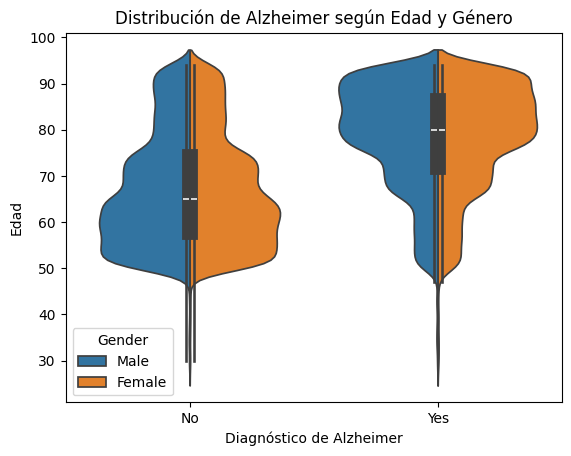

In [115]:
sns.violinplot(data=df_alzheimer_final, x='Alzheimer’s Diagnosis', y='Age', hue='Gender', split=True)
plt.title('Distribución de Alzheimer según Edad y Género')
plt.xlabel('Diagnóstico de Alzheimer')
plt.ylabel('Edad')
plt.show()

<font color='blue'>Al analizar el diagnostico de alzheimer con el sexo y la edad, podemos obtener mediante el gráfico de violín, que no hay diferencias significaticas entre ambos géneros, pero si podemos ver que podría existir una correlación entre las edades. Esto quiere decir que según lo que podemos observar, las personas entre mayor avanzan en edad, aumenta la probabilidad de presentar la patología, independientemente del sexo.</font>

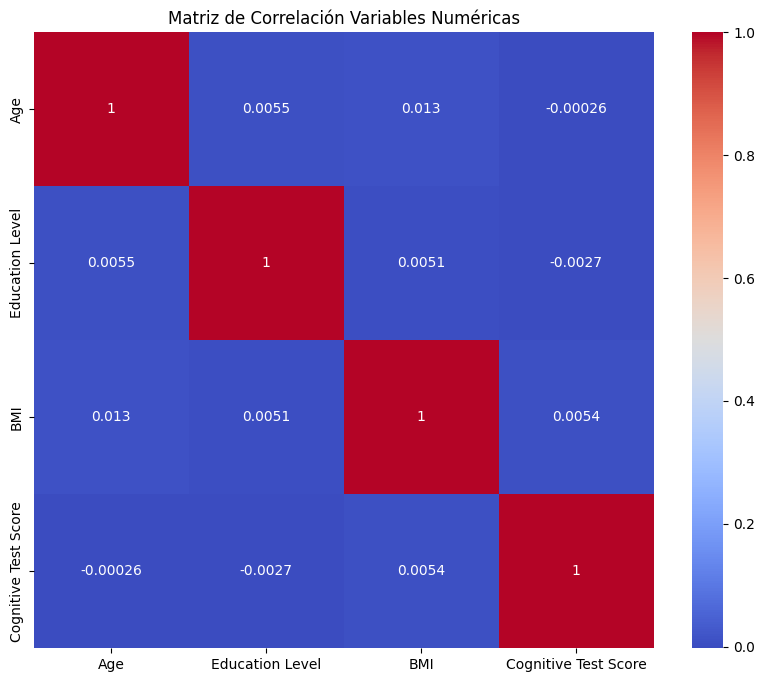

In [116]:
numeric_data = df_alzheimer_final.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación Variables Numéricas')
plt.show()

<font color='blue'>Al realizar una correlación entre las variables numéricas, podemos mencionar que existe una pequela correlación entre ellas, por lo que podriamos encontrar una fuerte correlación entre las otras variables categoricas.</font>

###**Conclusiones del EDA**

En el análisis univariado, se examina cada variable de manera aislada. Este enfoque permitió comprender la distribución y características principales de las variables clave del dataset, como la edad, sexo, y nivel educacional, entre otros. Este análisis ofrece una visión inicial del comportamiento individual de las variables y ayuda a identificar posibles errores o anomalías en los datos que podrían influir en análisis más complejos.

El análisis bivariado permitió explorar la relación entre dos variables. Este tipo de análisis permite encontrar asociaciones significativas entre variables, facilitando la toma de decisiones y proporcionando pistas sobre posibles relaciones causales.

El análisis multivariado profundizó aún más, considerando múltiples variables simultáneamente. A través de técnicas como diagramas de correlación y gráficos de violín. Este tipo de análisis permite comprender la dinámica global del dataset y es fundamental para desarrollar modelos predictivos o explicativos más precisos. Además, ofrece información relevante para diseñar estrategias más efectivas y tomar decisiones basadas en múltiples factores.

Finalmente, el uso combinado de los análisis univariado, bivariado y multivariado proporcionó una visión integral del dataset, junto con el uso de gráficos y análisis tanto absoluto como relativo, permitieron una comprensión profunda del fenómeno analizado y una toma de decisiones más informada.

#**Reprocesamiento de Datos**

###**One-Hot Encoding**

El proceso de transformación de datos mediante One Hot Encoding consiste en convertir las variables categóricas en representaciones numéricas binarias, donde cada categoría se transforma en una columna independiente con valores de 0 y 1. Esto es relevante porque los algoritmos de aprendizaje automático necesitan datos numéricos para funcionar correctamente, y esta técnica asegura que las relaciones inherentes entre categorías no se asuman como ordinales, evitando sesgos en el modelo.

In [117]:
df_alzheimer_one_hot_encoding = pd.get_dummies(df_alzheimer_final, columns=['Gender', 'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption', 'Diabetes', 'Hypertension', 'Cholesterol Level', 'Family History of Alzheimer’s', 'Depression Level', 'Sleep Quality', 'Air Pollution Exposure', 'Dietary Habits', 'Employment Status', 'Marital Status', 'Social Engagement Level', 'Stress Levels', 'Alzheimer’s Diagnosis']).astype(int)
df_alzheimer_one_hot_encoding.head()

,Age,Education Level,BMI,Cognitive Test Score,Gender_Female,Gender_Male,Physical Activity Level_High,Physical Activity Level_Low,Physical Activity Level_Medium,Smoking Status_Current,...,Marital Status_Single,Marital Status_Widowed,Social Engagement Level_High,Social Engagement Level_Low,Social Engagement Level_Medium,Stress Levels_High,Stress Levels_Low,Stress Levels_Medium,Alzheimer’s Diagnosis_No,Alzheimer’s Diagnosis_Yes
0,90,1,33,90,0,1,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0
1,72,7,29,65,0,1,0,0,1,0,...,0,1,1,0,0,1,0,0,1,0
2,86,19,22,43,1,0,1,0,0,1,...,1,0,0,1,0,1,0,0,1,0
3,53,17,31,81,0,1,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
4,58,3,30,49,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [118]:
df_alzheimer_one_hot_encoding.shape

(75373, 49)

In [119]:
df_alzheimer_one_hot_encoding.duplicated().sum()

np.int64(0)

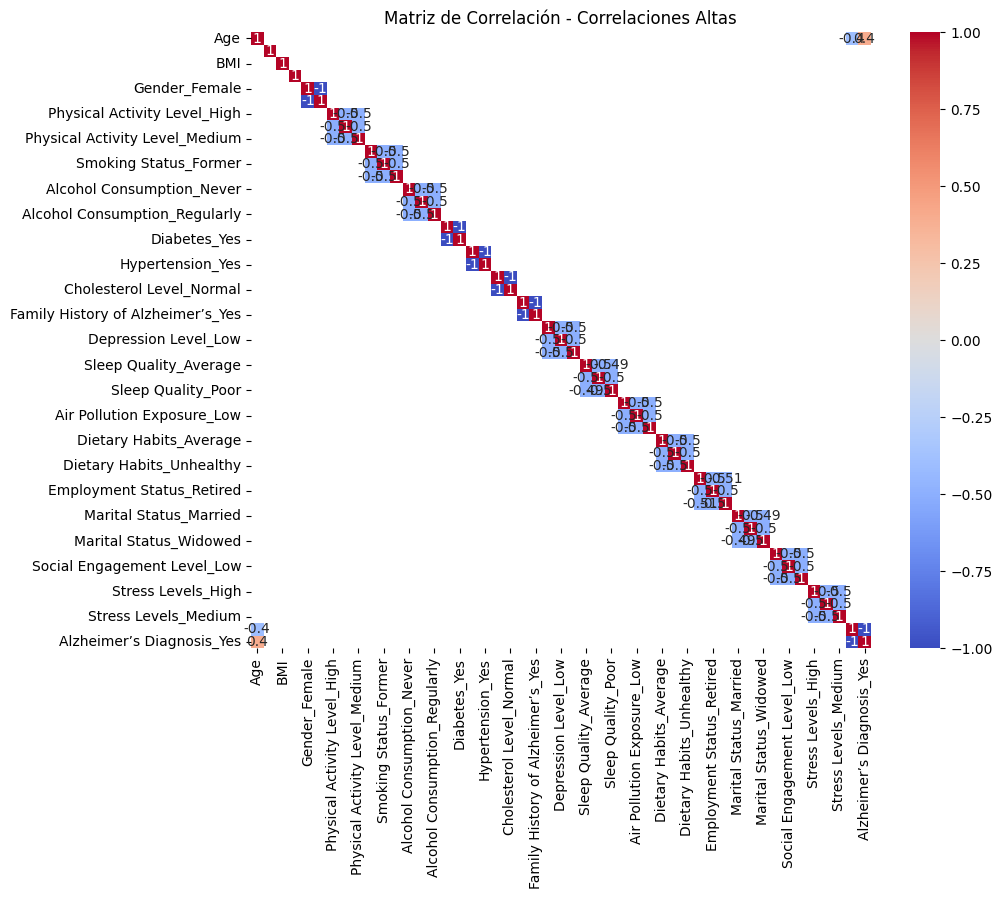

In [201]:
# Filtrar datos mayores (umbral: 0.3)
threshold = 0.3
filtered_corr_matrix = corr_matrix_2[(corr_matrix_2 >= threshold) | (corr_matrix_2 <= -threshold)]

# Graficar datos mayores
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', mask=filtered_corr_matrix.isnull())
plt.title('Matriz de Correlación - Correlaciones Altas')
plt.show()


<font color='blue'>La gráfica de correlación con un umbral de 0.3 muestra únicamente las relaciones moderadas entre las variables, lo que permite identificar las conexiones significativas dentro del conjunto de datos. Esto ayuda a comprender mejor la interdependencia entre características y optimizar la selección de variables para el modelo..</font>

###**Label Encoder**

El Label Encoding es una técnica utilizada para transformar variables categóricas en valores numéricos, asignando un número entero único a cada categoría. Este proceso es relevante porque los algoritmos de aprendizaje automático, especialmente los basados en árboles de decisión como Random Forest o XGBoost, pueden trabajar eficientemente con estas representaciones numéricas al mantener el orden implícito entre las categorías

In [198]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_alzheimer_final.loc[:,'Gender'] = le.fit_transform(df_alzheimer_final['Gender'])
df_alzheimer_final.loc[:,'Physical Activity Level'] = le.fit_transform(df_alzheimer_final['Physical Activity Level'])
df_alzheimer_final.loc[:,'Smoking Status'] = le.fit_transform(df_alzheimer_final['Smoking Status'])
df_alzheimer_final.loc[:,'Alcohol Consumption'] = le.fit_transform(df_alzheimer_final['Alcohol Consumption'])
df_alzheimer_final.loc[:,'Diabetes'] = le.fit_transform(df_alzheimer_final['Diabetes'])
df_alzheimer_final.loc[:,'Hypertension'] = le.fit_transform(df_alzheimer_final['Hypertension'])
df_alzheimer_final.loc[:,'Cholesterol Level'] = le.fit_transform(df_alzheimer_final['Cholesterol Level'])
df_alzheimer_final.loc[:,'Family History of Alzheimer’s'] = le.fit_transform(df_alzheimer_final['Family History of Alzheimer’s'])
df_alzheimer_final.loc[:,'Depression Level'] = le.fit_transform(df_alzheimer_final['Depression Level'])
df_alzheimer_final.loc[:,'Sleep Quality'] = le.fit_transform(df_alzheimer_final['Sleep Quality'])
df_alzheimer_final.loc[:,'Air Pollution Exposure'] = le.fit_transform(df_alzheimer_final['Air Pollution Exposure'])
df_alzheimer_final.loc[:,'Dietary Habits'] = le.fit_transform(df_alzheimer_final['Dietary Habits'])
df_alzheimer_final.loc[:,'Employment Status'] = le.fit_transform(df_alzheimer_final['Employment Status'])
df_alzheimer_final.loc[:,'Marital Status'] = le.fit_transform(df_alzheimer_final['Marital Status'])
df_alzheimer_final.loc[:,'Social Engagement Level'] = le.fit_transform(df_alzheimer_final['Social Engagement Level'])
df_alzheimer_final.loc[:,'Stress Levels'] = le.fit_transform(df_alzheimer_final['Stress Levels'])
df_alzheimer_final.loc[:,'Alzheimer’s Diagnosis'] = le.fit_transform(df_alzheimer_final['Alzheimer’s Diagnosis'])

In [122]:
df_alzheimer_final.head()

,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,...,Cognitive Test Score,Depression Level,Sleep Quality,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Social Engagement Level,Stress Levels,Alzheimer’s Diagnosis
0,90.0,1,1.0,33.0,2,2,1,0,0,1,...,90.0,1,2,1,0,1,1,1,0,0
1,72.0,1,7.0,29.9,2,1,0,0,0,1,...,65.0,1,1,1,2,2,2,0,0,0
2,86.0,0,19.0,22.9,0,0,1,0,1,1,...,43.0,0,1,0,2,0,1,1,0,0
3,53.0,1,17.0,31.2,1,2,2,1,0,1,...,81.0,2,0,1,2,1,1,0,1,0
4,58.0,0,3.0,30.0,0,1,0,1,0,1,...,49.0,0,2,2,0,0,0,1,0,0


In [199]:
df_alzheimer_final.shape

(75373, 21)

In [124]:
df_alzheimer_final.duplicated().sum()

np.int64(0)

In [125]:
df_alzheimer_final.columns

Index(['Age', 'Gender', 'Education Level', 'BMI', 'Physical Activity Level',
       'Smoking Status', 'Alcohol Consumption', 'Diabetes', 'Hypertension',
       'Cholesterol Level', 'Family History of Alzheimer’s',
       'Cognitive Test Score', 'Depression Level', 'Sleep Quality',
       'Dietary Habits', 'Air Pollution Exposure', 'Employment Status',
       'Marital Status', 'Social Engagement Level', 'Stress Levels',
       'Alzheimer’s Diagnosis'],
      dtype='object')

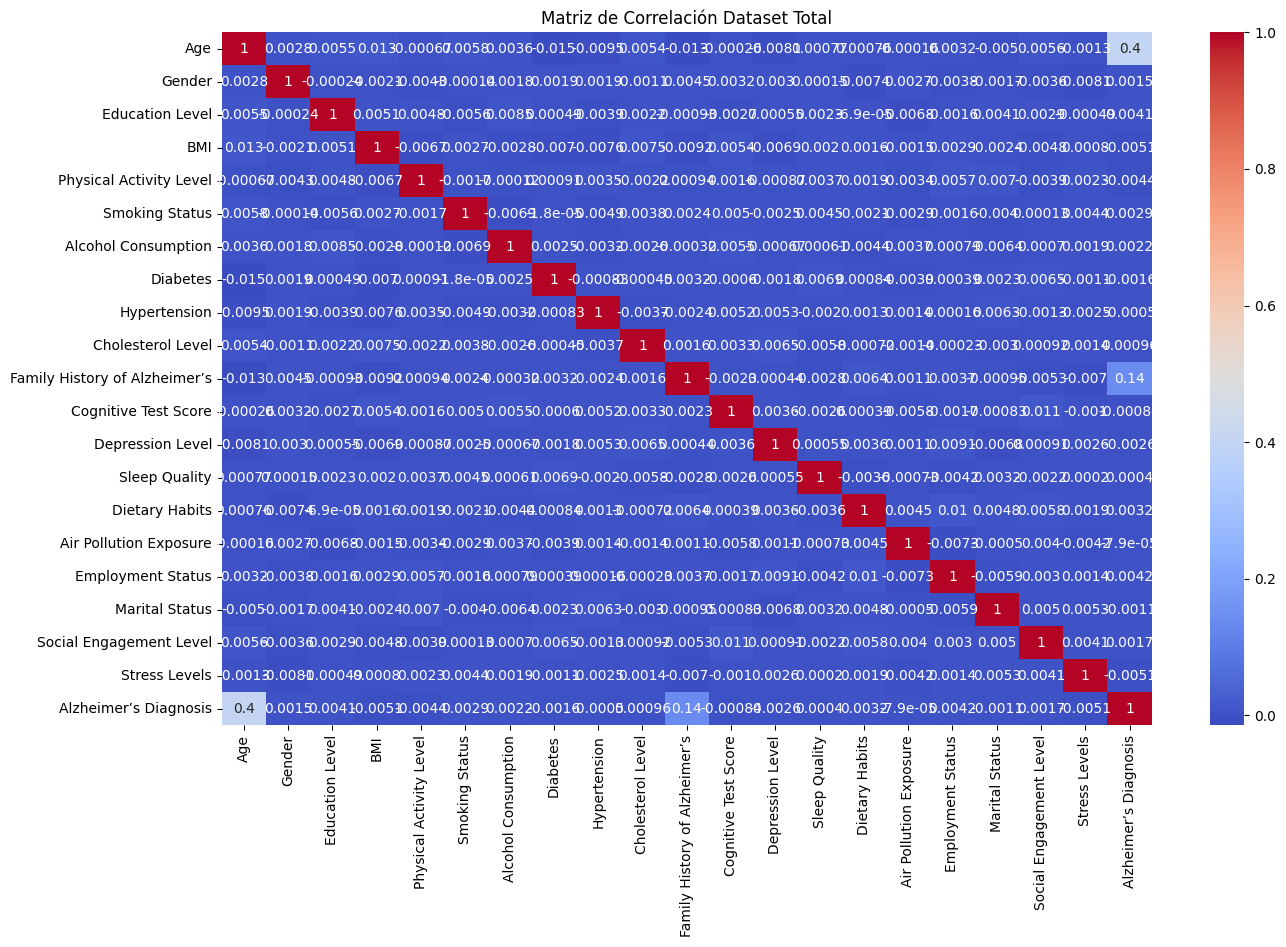

In [126]:
numeric_data_3 = df_alzheimer_final.select_dtypes(include=[np.number])
corr_matrix_3 = numeric_data_3.corr()

plt.figure(figsize=(15, 9))
sns.heatmap(corr_matrix_3, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación Dataset Total')
plt.show()

<font color='blue'>En el mismo sentido anterior (One Hot Encoding), se realiza una modificación del dataset para transformar las variables categóricas en variables numéricas con el método Label Encoder. A diferencia con el método anterior, el cual se crean columnas de acuerdo a la cantidad de categorías de una variable, este método no aumenta el numero de columnas, sino más bien a cada categoría de la variable le asigna un número, comenzando desde el cero. Esto quiere decir que si una variable presenta 4 categorías, esta columna se modifica con los resultados del 0 al 3.

Luego de la modificación del dataset, se realiza una evaluación para cerciorarse que no se crearan nuevas filas duplicadas, se visualizan las nuevas columnas y finalmente de realiza una matriz de correlación entre las variables, para determinar cual de ellas tiene una mayor correlación con la variable target y nos sirva para mejorar el modelo predictivo que se relaizará en el apartado siguiente.</font>

#**Feature Selection**

<font color='blue'>Una vez realizado y analizado la etapa de reprocesamiento de los datos por los dos métodos revisados en clases, este trabajo utilizará los resultados obtenidos con el método Label Encoder para realizar los modelos predictivos, pero dejando la inquietud de poder realizarlo en un futuro cercano con el método One Hot Encoding.

Como se mencionó anteriormente, Label Encoder modifica las varibales categóricas en una variable númerica asignando un número de acuerdo a la cantidad de categorías, comenzando desde el cero. Por lo que se nos hace necesario describir nuevamente las variables, considerando esta modificación.</font>

### **Descripción de las variables:**
Debido a que se realiza la modificación de variables categóricas a numéricas por medio del método Label Encoding, estas obtenien la siguiente clasificación:

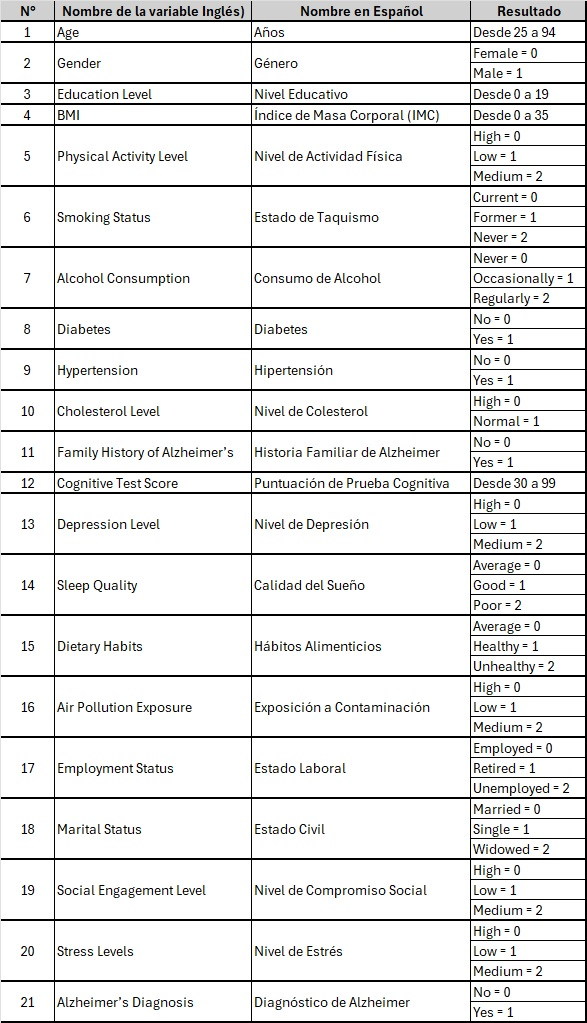

###**Modelo a Utilizar**

Para este análisis, se utilizará un **modelo de clasificación**, en este caso, utilizaremos Árbol de Decisiones, K-Nearest-Neighbors(KNN), Regresión Logística, Random Forest y XGBoost.

###**Argumentación:**

Debido a que nuestro trabajo presenta en su mayoría variables categóricas, se utilizará un modelo de clasificación y de este, utilizaremos los métodos revisados durante el curso y se determinará cual de estos presenta una mayor precisión.

#**Modelado**

###**Librerias necesarias para implementar los modelos**

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

###**División de datos en conjuntos de entrenamiento y prueba**

In [128]:
X = df_alzheimer_final.drop(['Alzheimer’s Diagnosis', 'Stress Levels', 'Marital Status', 'Marital Status'], axis=1) #Variables Predictorias
y = df_alzheimer_final['Alzheimer’s Diagnosis'] #Variable Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #División de los datos 80% entrenamiento y 20% para realizar test

<font color='blue'>Se definen las variables para los ejes "X" (variables predictorias) y eje "y" (variable target). Para la elaboración del eje X, se eliminan las columnas que no afectan o disminuyen la probabilidad de exito de predicción. Esto se realizó a base de pruebas con los métodos de clasificación, hasta obtener el mayor resultado posible.

El eje "y" se elabora solamente con la variable target (Alzheimer’s Diagnosis).</font>

<font color='blue'>Posteriormente, se divide el dataset en un 80% para el entrenamiento del modelo y un 20% para realizar las pruebas.

Estas variables serán utilizadas para los tres modelos a realizar.</font>

###**Entrenamiento Árbol de Decisión**

In [129]:
clf = DecisionTreeClassifier() # Modelo a realizar (Arbol de desición, clasificación por ser variables cualitativas)
clf.fit(X_train, y_train) # Se realiza el entrenamiento

DecisionTreeClassifier()

In [130]:
y_pred = clf.predict(X_test) #Se realizan predicciones con el 20% de las variables predictorias

<font color='blue'>Una vez realizado el entrenamiento del modelo, este es puesto a prueba con el 20% de los datos de las variables predictorias</font>

In [131]:
#Evaluación: Matriz de confusión y Reporte de Clasificación
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred)) #Se realiza matriz de confusión con el 20% de los datos separados para realizar los test y las prediciones del paso anterior
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred)) # Se crea un reporte de clasificación, utilizando las mismas variables que en la matriz de confusión

Matriz de Confusión:
 [[5909 2884]
 [2946 3336]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67      8793
           1       0.54      0.53      0.53      6282

    accuracy                           0.61     15075
   macro avg       0.60      0.60      0.60     15075
weighted avg       0.61      0.61      0.61     15075



In [182]:
accuracy_clf = clf.score(X_test, y_test)
print(f"Precisión del modelo: {accuracy_clf:.2f}")

Precisión del modelo: 0.61


<font color='blue'>Se realiza una un reporte de clasificación, realizando una comparación entre el 20% de la variable "y" destinada para realizar las pruebas y el 20% de la variable "X" destinada a realizar las pruebas y de las cuales obtuvimos una variable "y predictoria". Esto mismo aplica para realizar la matriz de confusión, la cual será explicada en el siguiente apartado.

Del reporte de clasificación realizado con el modelo del Árbol de decisión, podemos decir que las variables utilizadas presentan una precisión (Accuracy) global del 61%. Ahora bien, este modelo con 6.282 pruebas realizadas, tiene una precisión del 54% para determinar las personas que presentan depresión (1), con una sensibilidad (Recall) también del 53%. Además, podemos mencionar que de 8.793 pruebas realizadas para la predicción de personas que no presentan depresión(0), este modelo cuenta con un 67% de precisión y un 67% de sensibilidad (Recall) </font>

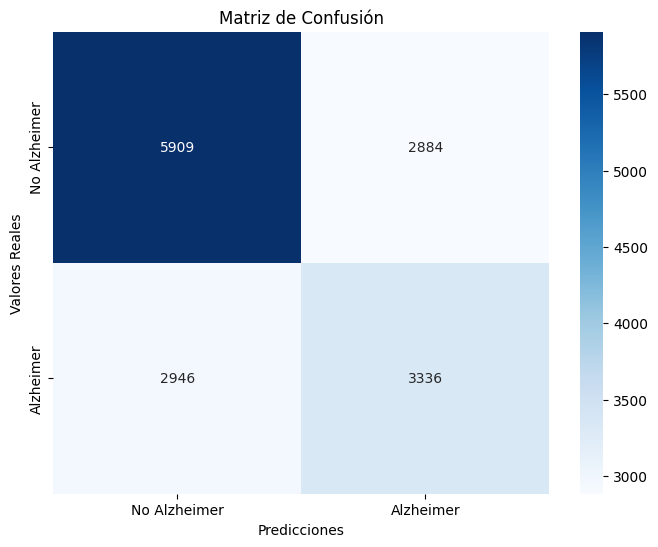

In [132]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Alzheimer', 'Alzheimer'], yticklabels=['No Alzheimer', 'Alzheimer'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

<font color='blue'>Como podemos ver en la matriz de confusión anterior, comparando los valores reales con la predicción de nuestro modelo, el modelo logró predecir con exactitud 5.909 veces cuando una persona no presentaba Alzheimer y errando 2.946 veces. Así mismo, logró predecir correctamente 3.336 veces cuando una persona presentaba alzheimer y errando 2.884 veces, predeciendo depresión cuando no lo era.  </font>

###**Entrenamiento K-Nearest-Neighbors (KNN)**

In [133]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [151]:
accuracy_knn = knn.score(X_test, y_test)
print(f"Precisión del modelo: {accuracy_knn:.2f}")

Precisión del modelo: 0.69


<font color='blue'>Con el modelo de KNN, este se realizó utilizando las misma División de datos en conjuntos de entrenamiento y prueba del arbol de decisión. Se realizó el ajuste de "K" de acuerdo al mayor valor obtenido en las pruebas realizadas, por lo que el mejor valor para la optimización de los resultados se obtubo un K=11. Posteriormente se realiza el entrenamiento y prueba del modelo, obteniendo una precisión del 69%, 8% mayor al obtenido con el modelo anterior.</font>

###**Entrenamiento Regresión Logística**

In [168]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [169]:
accuracy_reg = log_reg.score(X_test, y_test)
print(f"Precisión del modelo: {accuracy_reg:.2f}")

Precisión del modelo: 0.69


<font color='blue'>Con el modelo de Regresión Logística, este se realizó utilizando las misma División de datos en conjuntos de entrenamiento y prueba del arbol de decisión. Posteriormente se realiza el entrenamiento y prueba del modelo, obteniendo una precisión del 69%, 8% mayor al obtenido con el modelo de arbol de decisión y la misma precisión que el modelo anterior.</font>

###**Entrenamiento Random Forest**

In [137]:
from sklearn.ensemble import RandomForestClassifier

clf_2 = RandomForestClassifier(random_state=42)
clf_2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [167]:
y_pred_rf = clf_2.predict(X_test)
accuracy_rf = clf_2.score(X_test, y_test)
print("Exactitud del modelo:", accuracy_score(y_test, y_pred_rf))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_rf))

Exactitud del modelo: 0.708391376451078

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.75      0.76      0.75      8793
           1       0.65      0.64      0.65      6282

    accuracy                           0.71     15075
   macro avg       0.70      0.70      0.70     15075
weighted avg       0.71      0.71      0.71     15075



<font color='blue'>Con el modelo de Random Forest, se realizó utilizando las misma División de datos en conjuntos de entrenamiento y prueba de los modelos anteriores. Posteriormente se realiza el entrenamiento y prueba del modelo, obteniendo una precisión del 70,83%, el mayor de los resultados obtenidos hasta el momento entre todos los modelos realizados.</font>

###**Entrenamiento XGBoost**

In [139]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [166]:
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_xgb = xgb_classifier.score(X_test, y_test)
print("Exactitud del modelo:", accuracy_score(y_test, y_pred_xgb))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_xgb))

Exactitud del modelo: 0.7038805970149253

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.74      0.75      0.75      8793
           1       0.65      0.64      0.64      6282

    accuracy                           0.70     15075
   macro avg       0.70      0.69      0.70     15075
weighted avg       0.70      0.70      0.70     15075



<font color='blue'>Con el modelo de XGBoost, se realizó utilizando las misma División de datos en conjuntos de entrenamiento y prueba de los modelos anteriores. Posteriormente se realiza el entrenamiento y prueba del modelo, obteniendo una precisión del 70,38%, muy cercano al resultado de Random Forest, teniendo sus principales diferencias en la Presiciópn de los resultados con personas que no presentan Alzheimer con un 75% vs 74% para este modelo. </font>

###**Precisión de los Modelos**

In [171]:
# Diccionario con modelos y sus resultados
resultados = {
    'Modelo': ['Árbol de Decisión', 'KNN', 'Regresión Logística', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_clf, accuracy_knn, accuracy_reg, accuracy_rf, accuracy_xgb]
}

# Crear DataFrame
tabla_resultados = pd.DataFrame(resultados)

# Opcional: ordenar de mayor a menor
tabla_resultados = tabla_resultados.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Mostrar
print(tabla_resultados)


                Modelo  Accuracy
0        Random Forest  0.708391
1              XGBoost  0.703881
2  Regresión Logística  0.694594
3                  KNN  0.687032
4    Árbol de Decisión  0.613267


<font color='blue'>Se agrupan y comparan los resultados obtenidos entre todos los modelos utilizados. Considerando que la mayoría de los modelos utilizados obtuvieron valores cercanos, a excepción del árbol de decisiones con un 61% en ´´ultimo lugar. Los demás modelos evaluados obtuvieron resultados entre el 68% y 70%. Obtneiendo que la mayor presión se obtuvo con el modelo de Random Forest con un 70,83%. En segundo lugar, muy cercano en sus resultados, con un 70,38% se obtiene con el modelo XGBoost </font>

#**Optimización del Modelo**

##**Validación del Modelo**

La validación de datos es el proceso de verificar que los datos recopilados o utilizados en un sistema sean precisos, consistentes y estén completos, asegurando que cumplan con los requisitos esperados. Es fundamental porque garantiza la calidad de los datos, lo que a su vez mejora la fiabilidad de los análisis, decisiones y resultados derivados de ellos. Sin una validación adecuada, los datos erróneos o inconsistentes podrían llevar a conclusiones incorrectas, errores operativos y problemas significativos en aplicaciones críticas como la ciencia, la economía o la toma de decisiones empresariales.

En este apartado se realizará una validación cruzada utilizando Kfold, de los modelos utilizados en el apartado anterior.

In [141]:
from sklearn.model_selection import KFold, cross_val_score

###**K-Fold Cross-Validation: Decision Tree Classifier**

In [142]:
kf_1 = KFold(n_splits=7, shuffle=True, random_state=42)
model_1 = DecisionTreeClassifier(random_state=42)

dtc_scores = cross_val_score(model_1, X, y, cv=kf_1, scoring='accuracy')
print("Exactitud promedio con K-Fold:", np.mean(dtc_scores))
print("Puntajes individuales:", dtc_scores)

Exactitud promedio con K-Fold: 0.6094225314375511
Puntajes individuales: [0.60874814 0.60986256 0.61097697 0.60364042 0.60778304 0.61103371
 0.61391288]


<font color='blue'>Al realizar la validación cruzada del modelo de Árbol de Decisiones, obtenemos una exactitud promedio del 60,9%. Muy similar al resultado obtenido con el modelado simple, el cual se obtuvo un 61% </font>

###**K-Fold Cross-Validation: K-Nearest-Neighbors (KNN)**

In [143]:
kf_2 = KFold(n_splits=7, shuffle=True, random_state=42)
model_2 = KNeighborsClassifier(n_neighbors=11)

knn_scores = cross_val_score(model_2, X, y, cv=kf_2, scoring='accuracy')
print("Exactitud promedio con K-Fold:", np.mean(knn_scores))
print("Puntajes individuales:", knn_scores)

Exactitud promedio con K-Fold: 0.6876069046876786
Puntajes individuales: [0.68619985 0.69511516 0.69093611 0.68294948 0.68728522 0.68774961
 0.68301291]


<font color='blue'>Al realizar la validación cruzada del modelo KNN, obtenemos una exactitud promedio del 68,7%. EL mismo porcentaje obtenido con el modelado simple.  </font>

###**K-Fold Cross-Validation: Random Forest**

In [186]:
kf = KFold(n_splits=7, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

rf_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
print("Exactitud promedio con K-Fold:", np.mean(rf_scores))
print("Puntajes individuales:", rf_scores)

Exactitud promedio con K-Fold: 0.7090734857408928
Puntajes individuales: [0.70681649 0.7105312  0.71043834 0.71266716 0.70604625 0.7129191
 0.70409585]


<font color='blue'>Al realizar la validación cruzada del modelo Random Forest, obtenemos una exactitud promedio del 70,90%. Aumentando sin significancia desde un 70,83%.  </font>

###**K-Fold Cross-Validation: XGBoost**

In [188]:
kf_2 = KFold(n_splits=7, shuffle=True, random_state=42)
model_2 = XGBClassifier(eval_metric='logloss')

xgb_scores = cross_val_score(model_2, X, y, cv=kf_2, scoring='accuracy')
print("Exactitud promedio con K-Fold:", np.mean(xgb_scores))
print("Puntajes individuales:", xgb_scores)

Exactitud promedio con K-Fold: 0.7061281710921347
Puntajes individuales: [0.70468053 0.70551634 0.70486627 0.71080981 0.70474598 0.70790378
 0.70437448]


<font color='blue'>Al realizar la validación cruzada del modelo Random Forest, obtenemos una exactitud promedio del 70,61%. Aumentando sin significancia desde un 70,38%.  </font>

###**Exactitud promedio con K-Fold Cross-Validation**

In [195]:
# Calcular los promedios
resultados_2 = {
    'Modelo': ['Árbol de Decisión', 'KNN', 'Random Forest', 'XGBoost'],
    'Exactitud Promedio': [
        np.mean(dtc_scores),
        np.mean(knn_scores),
        np.mean(rf_scores),
        np.mean(xgb_scores)
    ]
}

# Crear la tabla
tabla_cv = pd.DataFrame(resultados_2)

# Ordenar de mayor a menor
tabla_cv = tabla_cv.sort_values(by='Exactitud Promedio', ascending=False).reset_index(drop=True)

# Mostrar tabla redondeada
print(tabla_cv.round(3))


              Modelo  Exactitud Promedio
0      Random Forest               0.709
1            XGBoost               0.706
2                KNN               0.688
3  Árbol de Decisión               0.609


<font color='blue'>De todas las validaciones cruzadas realizadas a los modelos utilizados, en todos los casos hubo un aumento no significativo. Manteniendo en primer lugar al Modelo de Random Forest y en segundo lugar al modelos XGBoost. </font>

##**Ajustes del Modelado**

El ajuste de modelos por hiperparámetros es el proceso de seleccionar los valores óptimos de los parámetros configurables de un modelo de aprendizaje automático que no se ajustan durante el entrenamiento, como la tasa de aprendizaje, la cantidad de árboles en un bosque aleatorio o la regularización en un modelo de regresión. Este proceso es esencial porque los hiperparámetros influyen directamente en el desempeño del modelo, afectando tanto la capacidad de generalización como la precisión en las predicciones. Ajustarlos adecuadamente permite mejorar el equilibrio entre sobreajuste y subajuste, asegurando que el modelo funcione de manera eficiente con datos no vistos.

En este apartado se realizarán ajustes de hiperparámetros a los dos modelos que obtuvieron los mejores rendimientos tanto en el modelado simple, como en su validación cruzada.

###**Random Forest con Hiperparámetros**

In [150]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Grid Search con validación cruzada
grid_search = GridSearchCV(estimator= clf_2, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el mejor modelo
mejor_modelo = grid_search.best_estimator_
y_pred_best = mejor_modelo.predict(X_test)

print(classification_report(y_test, y_pred_best))
print("Exactitud del modelo:", accuracy_score(y_test, y_pred_best))

Mejores parámetros encontrados:
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      8793
           1       0.66      0.66      0.66      6282

    accuracy                           0.72     15075
   macro avg       0.71      0.71      0.71     15075
weighted avg       0.72      0.72      0.72     15075

Exactitud del modelo: 0.7160199004975124


<font color='blue'>Al aplicar hiperparámetros a RAndom Forest, podemos notar que existe un pequeño aumento en su rendimiento en comparación al modelado sin ajustar. Obteneidno un Accuracy del 72% versus el 71% de los obtenido en un principio. Si bien no hubo un aumento significativo, al realizar ciertos ajustes al modelo, podemos optrimizarlo de mejor manera y con eso, obtener mejores resultados. </font>

###**XGBoost con Hiperparámetros**

In [194]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Modelo base
xgb = XGBClassifier(eval_metric='mlogloss')

# GridSearch con validación cruzada
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)

# Evaluar
mejor_modelo = grid.best_estimator_
y_pred_best_xgb = mejor_modelo.predict(X_test)
print(classification_report(y_test, y_pred_best_xgb))
print("Exactitud del modelo:", accuracy_score(y_test, y_pred_best_xgb))


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Mejores parámetros: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.76      0.75      0.76      8793
           1       0.66      0.66      0.66      6282

    accuracy                           0.72     15075
   macro avg       0.71      0.71      0.71     15075
weighted avg       0.72      0.72      0.72     15075

Exactitud del modelo: 0.7160862354892206


<font color='blue'>Al aplicar hiperparámetros al modelo XGBoost, podemos notar que existe un pequeño aumento en su rendimiento en comparación al modelado sin ajustar. Obteneidno un Accuracy del 72% versus el 70% de los obtenido en un principio. Si bien no hubo un aumento significativo, al realizar ciertos ajustes al modelo, podemos optrimizarlo de mejor manera y con eso, obtener mejores resultados. </font>

###**Resultados Hiperparámetros**

In [197]:
print("Exactitud del modelo Random Forest:", accuracy_score(y_test, y_pred_best))
print("Exactitud del modelo XGBoost:", accuracy_score(y_test, y_pred_best_xgb))

Exactitud del modelo Random Forest: 0.7160199004975124
Exactitud del modelo XGBoost: 0.7160862354892206


<font color='blue'>En una mirada general, de los resultados obtenidos de nuestros modelos ajustados, los modelos XGBoost y Random Forest fueron los que mejores rendimientos se obtuvieron y en porcentajes similares. Obteniendo ambos una precisión final con el uso de hiperparámetros del 71,60% </font>

#**Conclusiones Finales**

El desarrollo de este proyecto de ciencia de datos ha permitido una exploración profunda del conjunto de datos clínicos relacionado con el alzheimer, siguiendo las etapas fundamentales del proceso analítico. En primer lugar, configuramos el entorno de trabajo seleccionando y escribiendo las librerías necesarias, como pandas, numpy, matplotlib, seaborn, sklearn, entre otras, y preparando el entorno para asegurar la correcta ejecución del análisis. A partir de allí, realizamos un análisis univariado, bivariado y multivariado para comprender la distribución de cada variable y la interacción entre ellas. Se emplearon diferentes visualizaciones, los cuales facilitaron la interpretación de patrones relevantes en los datos.

Durante la fase de preprocesamiento, se gestionaron los valores nulos, los datos duplicados y las inconsistencias. Optamos por técnicas de transformación como label encoding y one-hot encoding para convertir las variables categóricas en un formato adecuado para los modelos de machine learning. Con los datos ya limpios y estructurados, se procedió a seleccionar los modelos de predicción idóneos, dado que el objetivo era clasificar la presencia o ausencia de alzheimer. En nuestro caso, se probaron diferentes algoritmos, como regresión logística, K-Nearest Neighbors (KNN), árboles de decisión, Random Forest y XGBoost para identificar cuál ofrecía el mejor desempeño en términos de métricas clave como precisión, recall y F1-score.

La búsqueda de las variables más predictivas nos permitió optimizar los modelos, descartando aquellas con menor relevancia. Tras entrenar los algoritmos, se sometieron a pruebas utilizando conjuntos de validación, pruebas cruzadas para evaluar su rendimiento y ajustes de los modelos utilizando hiperparámetros. Finalmente, seleccionamos el modelo con mejor performance, asegurando un balance entre la capacidad predictiva y la interpretabilidad, aspectos esenciales para su aplicación en entornos clínicos. Este proceso estructurado de análisis evidencia cómo la ciencia de datos puede contribuir a la toma de decisiones informadas, facilitando la creación de modelos predictivos que puedan ser utilizados en la práctica médica para mejorar los diagnósticos y tratamientos de la enfermedad.

En la predicción de Alzheimer, el modelo de clasificación con mejor desempeño alcanzó una precisión aproximada del 72%, destacando los algoritmos XGBoost y Random Forest gracias al uso de ajustes de hiperparámetros. Este rendimiento moderado podría deberse a factores como la complejidad intrínseca de la enfermedad, ya que el Alzheimer depende de múltiples variables clínicas, genéticas y ambientales que pueden no estar completamente representadas en los datos. Además, el tamaño o la calidad del conjunto de datos podría haber sido limitado, con posibles desequilibrios en las clases o información no relevante que afecte la capacidad del modelo para generalizar. Para mejorar en futuros análisis, se recomienda expandir y mejorar la calidad del conjunto de datos, considerando la inclusión de características adicionales como biomarcadores, imágenes cerebrales o datos longitudinales. Asimismo, la implementación de técnicas como el balanceo de clases, la selección de características relevantes y el uso de enfoques más avanzados como redes neuronales profundas podrían incrementar significativamente el desempeño del modelo.

#**Repositorio GitHub**

https://github.com/CrisEsparza/CoderHouse.git